In [100]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
!pip install missingno
import missingno as msno
import string
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.stats import f_oneway
import warnings

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# to check the working directory
os.getcwd()

'C:\\Users\\wajiz.pk\\Desktop\\FINAL PROJECT BI'

In [3]:
#uploading csv file
df1 = pd.read_csv ('Cleaned_Customer.csv')
df2 = pd.read_csv ('Cleaned_CustomerLedger.csv')
df3 = pd.read_csv ('Cleaned_CustomerWise.csv')
df4 = pd.read_csv ('Cleaned_DataDump.csv')
df5 = pd.read_csv ('Cleaned_Item.csv')
df6 = pd.read_csv ('Cleaned_Purchase.csv')

In [4]:
df1.head()

,CustomerCode,CustomerTitle,DestinationCategoryTitle,DestinationGroupTitle,Email,ContactNumber,MobileNumber,CreditDays,ISRegistered,STRegistrationNo,AccountCode,AccountTitle,NTN,NationalTitle,RegionTitle,TerritoryTitle,TownTitle,ZoneTitle,Active,Address
0,1,kawish jodia,trader,adil,ali.qamber@atlashonda.com.pk,021-32575561,0332-2483905,30,Yes,0,101002001,Account Receivable,3771196-2,None,None,None,karachi,sindh,Yes,"F-36, ESTATE AVENUE, S.I.T.E. KARACHI"
1,2,Bashir & Sons,trader,adnan,mwhaque@atlashonda.com.pk,021-32575561,0333-2196823,30,Yes,0,101002001,Account Receivable,0801063-3,None,None,None,lahore,punjab,Yes,"F-36, ESTATE AVENUE, S.I.T.E. KARACHI"
2,3,Ghulam Abbas jodia,trader,adnan,arslan.amin@atlashitec.com.pk,021-32575561,+92 (333) 3550323,30,Yes,0,101002001,Account Receivable,4040362-9,None,None,None,karachi,sindh,Yes,"F-36, ESTATE AVENUE, S.I.T.E. KARACHI"
3,4,Prawn ckr Sadrudin impres market,trader,adil,None@gmail.com,-,-,30,Yes,0,101002001,Account Receivable,-,None,None,None,karachi,sindh,Yes,None
4,5,Umar ckr,trader,adnan,None@gmail.com,-,-,30,Yes,0,101002001,Account Receivable,-,None,None,None,karachi,sindh,Yes,None


In [5]:
df2.head()

,TranNo,TranDate,CustomerID,CustomerTitle,Amount,TranType,TranOrder,DestinationRefNo
0,1819-000135,17/12/2018,1645,kawish jodia,-7370.0,Receipt,1,1
1,CCN1819-000047,31/12/2018,1645,kawish jodia,-7416.0,CrNote,4,1
2,CCN1819-000048,06/02/2019,1645,kawish jodia,-24000.0,CrNote,4,1
3,1819-000826,08/02/2019,1645,kawish jodia,38760.0,Invoice,4,1
4,CDN1819-000131,12/03/2019,1645,kawish jodia,26.0,DrNote,4,1


In [6]:
df3.head()

,Transaction ID,Transaction Date,Customer Title,Item ID,Item Title,Unit Title,Quantity,Rate,Gross Amount,Discount Amount,Value Excl Tax,Net Amount
0,1819-000004,14/12/2018,Haram traders shahfaisal,55.0,HOT AND SOUR SOUP 55 GM,pcs,576.0,50.0,28800.0,3456.0,25344.0,25344.0
1,1819-000004,14/12/2018,Haram traders shahfaisal,3.0,SEASONING CHICKEN POWDER 18GM,pcs,5760.0,12.0,69120.0,8294.4,60825.6,60825.6
2,1819-000004,14/12/2018,Haram traders shahfaisal,175.0,PAPAD CRACKER BUTTON COLOR 1KG,kg,24.0,160.0,3840.0,460.8,3379.2,3379.2
3,1819-000004,14/12/2018,Haram traders shahfaisal,40.0,PAPAD CRACKER COLOR 1KG,kg,144.0,160.0,23040.0,2764.8,20275.2,20275.2
4,1819-000004,14/12/2018,Haram traders shahfaisal,6.0,SEASONING CHICKEN POWDER POUCH 1KG,pcs,144.0,400.0,57600.0,6912.0,50688.0,50688.0


In [7]:
df4.head()

,sync_time,Customer,Area,City,ProductName,qty,amount,Rate,employeeName,distributorName,BrandName,ProductCategoryName
0,11/30/2021 16:39,Baba Oil Shop,FATIMA JINNAH COLONY,Karachi,Dashi Powder Chicken Sachet 18g,48,624.00,13.00,Muzzamil,asad enterprise,Dashi,retail
1,11/30/2021 16:39,Baba Oil Shop,FATIMA JINNAH COLONY,Karachi,Dashi Powder Chicken 100g,24,1680.00,70.00,Muzzamil,asad enterprise,Dashi,retail
2,11/30/2021 16:40,Obaid Shop,FATIMA JINNAH COLONY,Karachi,Dashi Powder Chicken Sachet 18g,12,156.00,13.00,Muzzamil,asad enterprise,Dashi,retail
3,11/30/2021 16:40,Obaid Shop,FATIMA JINNAH COLONY,Karachi,Funchies Mingalz Choco Balls 12g,12,99.96,8.33,Muzzamil,asad enterprise,Funchies,retail
4,11/30/2021 16:40,Obaid Shop,FATIMA JINNAH COLONY,Karachi,Funchies Mingalz Choco Bites 12g purple,12,99.96,8.33,Muzzamil,asad enterprise,Funchies,retail


In [8]:
df5.head()

,ItemRefNo,ItemTitle,CategoryTitle,SupplierTitle,ClassTitle,GroupTitle,TypeTitle,PackagingTitle,UOMTitle,TaxCategoryTitle,...,DecimalPlaceCount,ManualRate,PurchaseRate,BatchNoRequired,NonInventory,Production,Purchase,QC,Sale,TaxBasedOnCustomer
0,187,Scourer 18gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No
1,188,Scourer 36gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No
2,235,Scourer 20gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No
3,408,SCOURER 15GM,Scourer,None,scourer,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No
4,184,PAPAD TRIANGLE 500GM,cracker,None,3d,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No


In [9]:
df6.head()

,Transaction Date,Supplier Title,Supplier Category,Project Title,Currency Title,Type Title,Godown Title,Category Title,Class Title,Brand Title,Item Title,Unit Title,Item Description,Quantity,Rate,Gross Amount,SalesTax Amount,Net Amount
0,12/1/2018,Sugar Bashir Sugar (SAAD) JODIA,SERVICES,None,PAK Rupee,sugar,Factory Warehouse,glucose & sugar,others,raw material,sugar -moti Ahmed Sb,kg,invert sugar,1250.00,52.00,65000.00,0.00,65000.00
1,12/4/2018,Speciality Printers,PACKING MATERIAL,None,PAK Rupee,soup & ckp,Factory Warehouse,filmFlexiblePackaging,soup & ckp,packing material,chicken powder 100gm roll (new),kg,chicken powder 100gm roll total 78rolls,897.19,445.00,399249.55,67872.42,467121.97
2,12/4/2018,Atif Riaz (Rafhan Corn Starch),RAW MATERIAL,None,PAK Rupee,starchCorn,Factory Warehouse,flour,cracker,raw material,corn starch rafhan 034010,kg,cracker & chicken powder production,15000.00,69.85,1047735.00,0.00,1047735.00
3,12/4/2018,Unity Foods Limited,RAW MATERIAL,None,PAK Rupee,HPKO,Factory Warehouse,Fat,whipCream,raw material,Fat Willmar HPKO,kg,cream production,2000.00,199.00,398000.00,0.00,398000.00
4,12/4/2018,Vendor cash partys,SERVICES,None,PAK Rupee,cornFlour,Factory Warehouse,flour,mingalz,raw material,Corn Flour MMFS2,kg,for funchies production,200.00,39.00,7800.00,0.00,7800.00


-We will examine each sheet individually, search for any missing numbers, and validate the data types.

# Sheet 1 - Customer 

In [11]:
df1.dtypes

CustomerCode                 int64
CustomerTitle               object
DestinationCategoryTitle    object
DestinationGroupTitle       object
Email                       object
ContactNumber               object
MobileNumber                object
CreditDays                   int64
ISRegistered                object
STRegistrationNo             int64
AccountCode                  int64
AccountTitle                object
NTN                         object
NationalTitle               object
RegionTitle                 object
TerritoryTitle              object
TownTitle                   object
ZoneTitle                   object
Active                      object
Address                     object
dtype: object

In [13]:
df1.shape

(518, 20)

In [14]:
df1.isnull().sum()

CustomerCode                0
CustomerTitle               0
DestinationCategoryTitle    0
DestinationGroupTitle       0
Email                       0
ContactNumber               0
MobileNumber                0
CreditDays                  0
ISRegistered                0
STRegistrationNo            0
AccountCode                 0
AccountTitle                0
NTN                         0
NationalTitle               0
RegionTitle                 0
TerritoryTitle              0
TownTitle                   0
ZoneTitle                   0
Active                      0
Address                     0
dtype: int64

<AxesSubplot:>

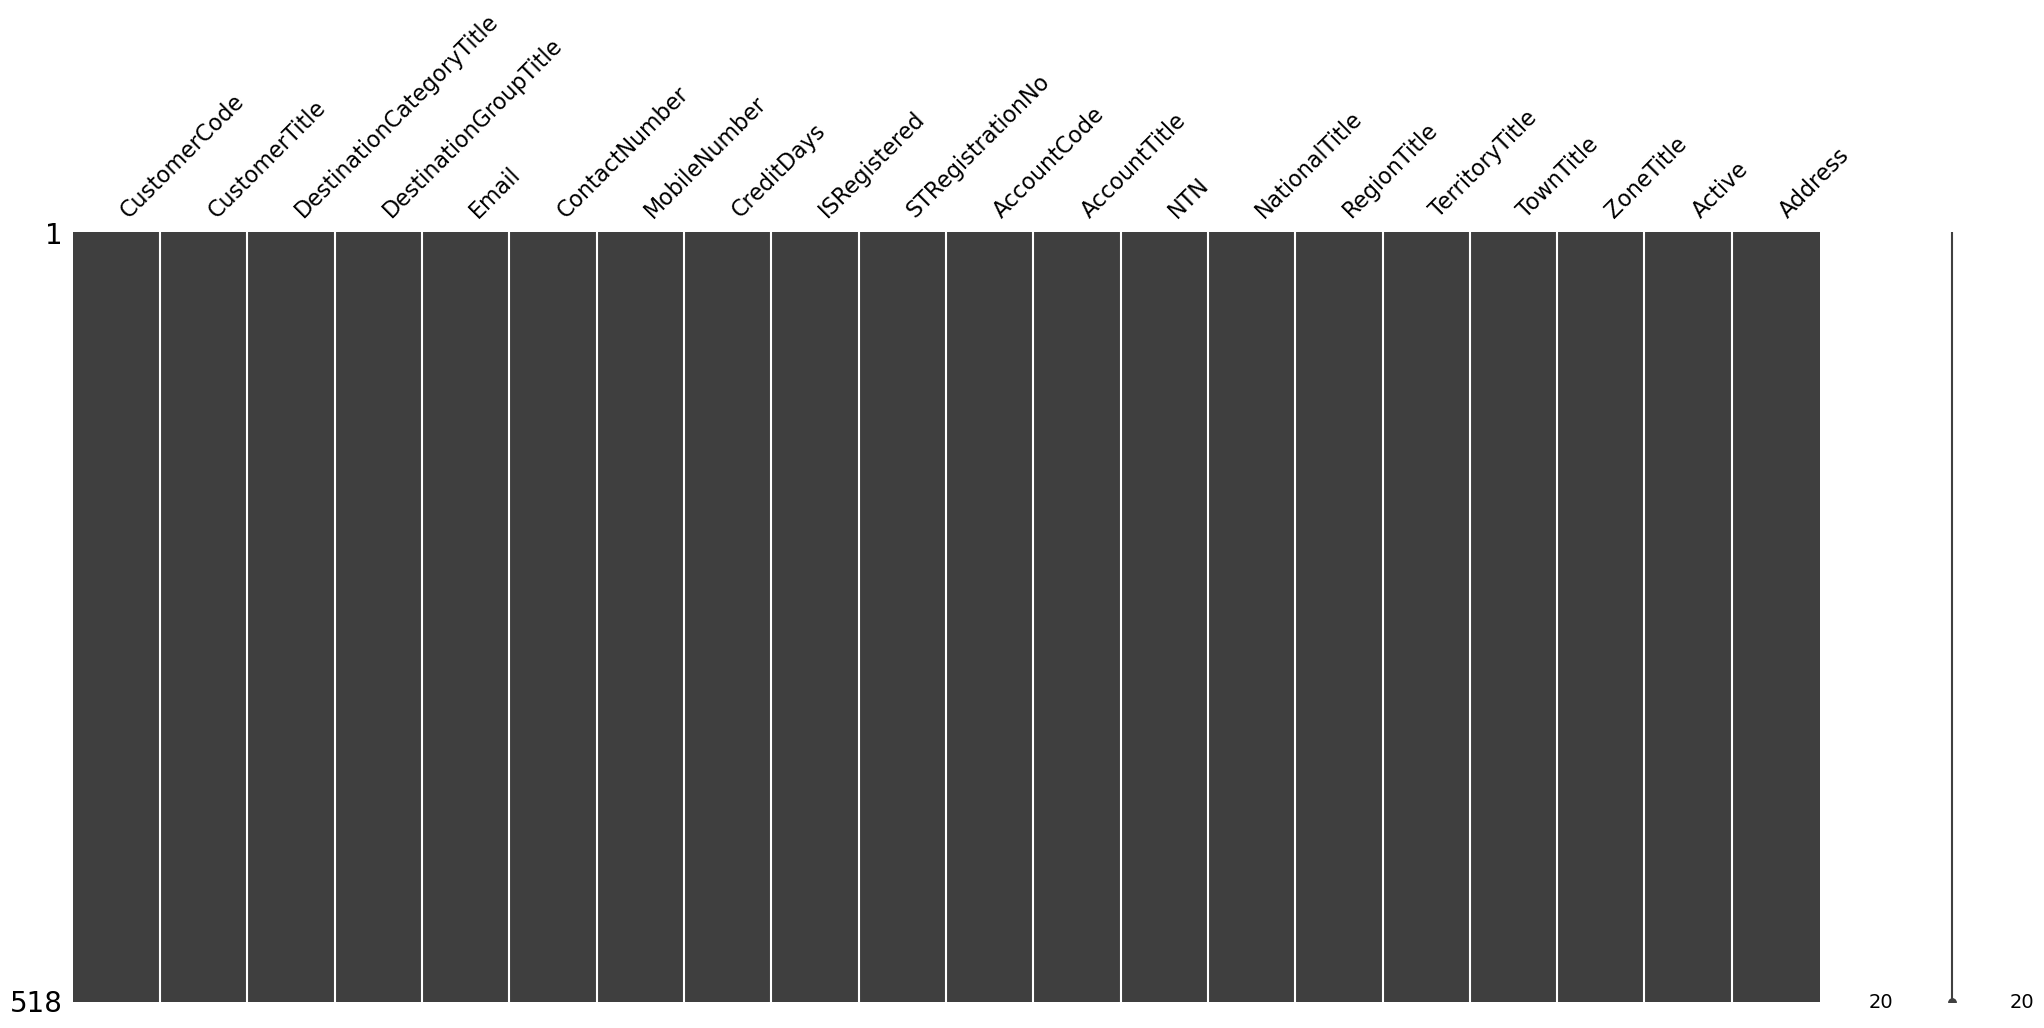

In [15]:
msno.matrix(df1)

<AxesSubplot:>

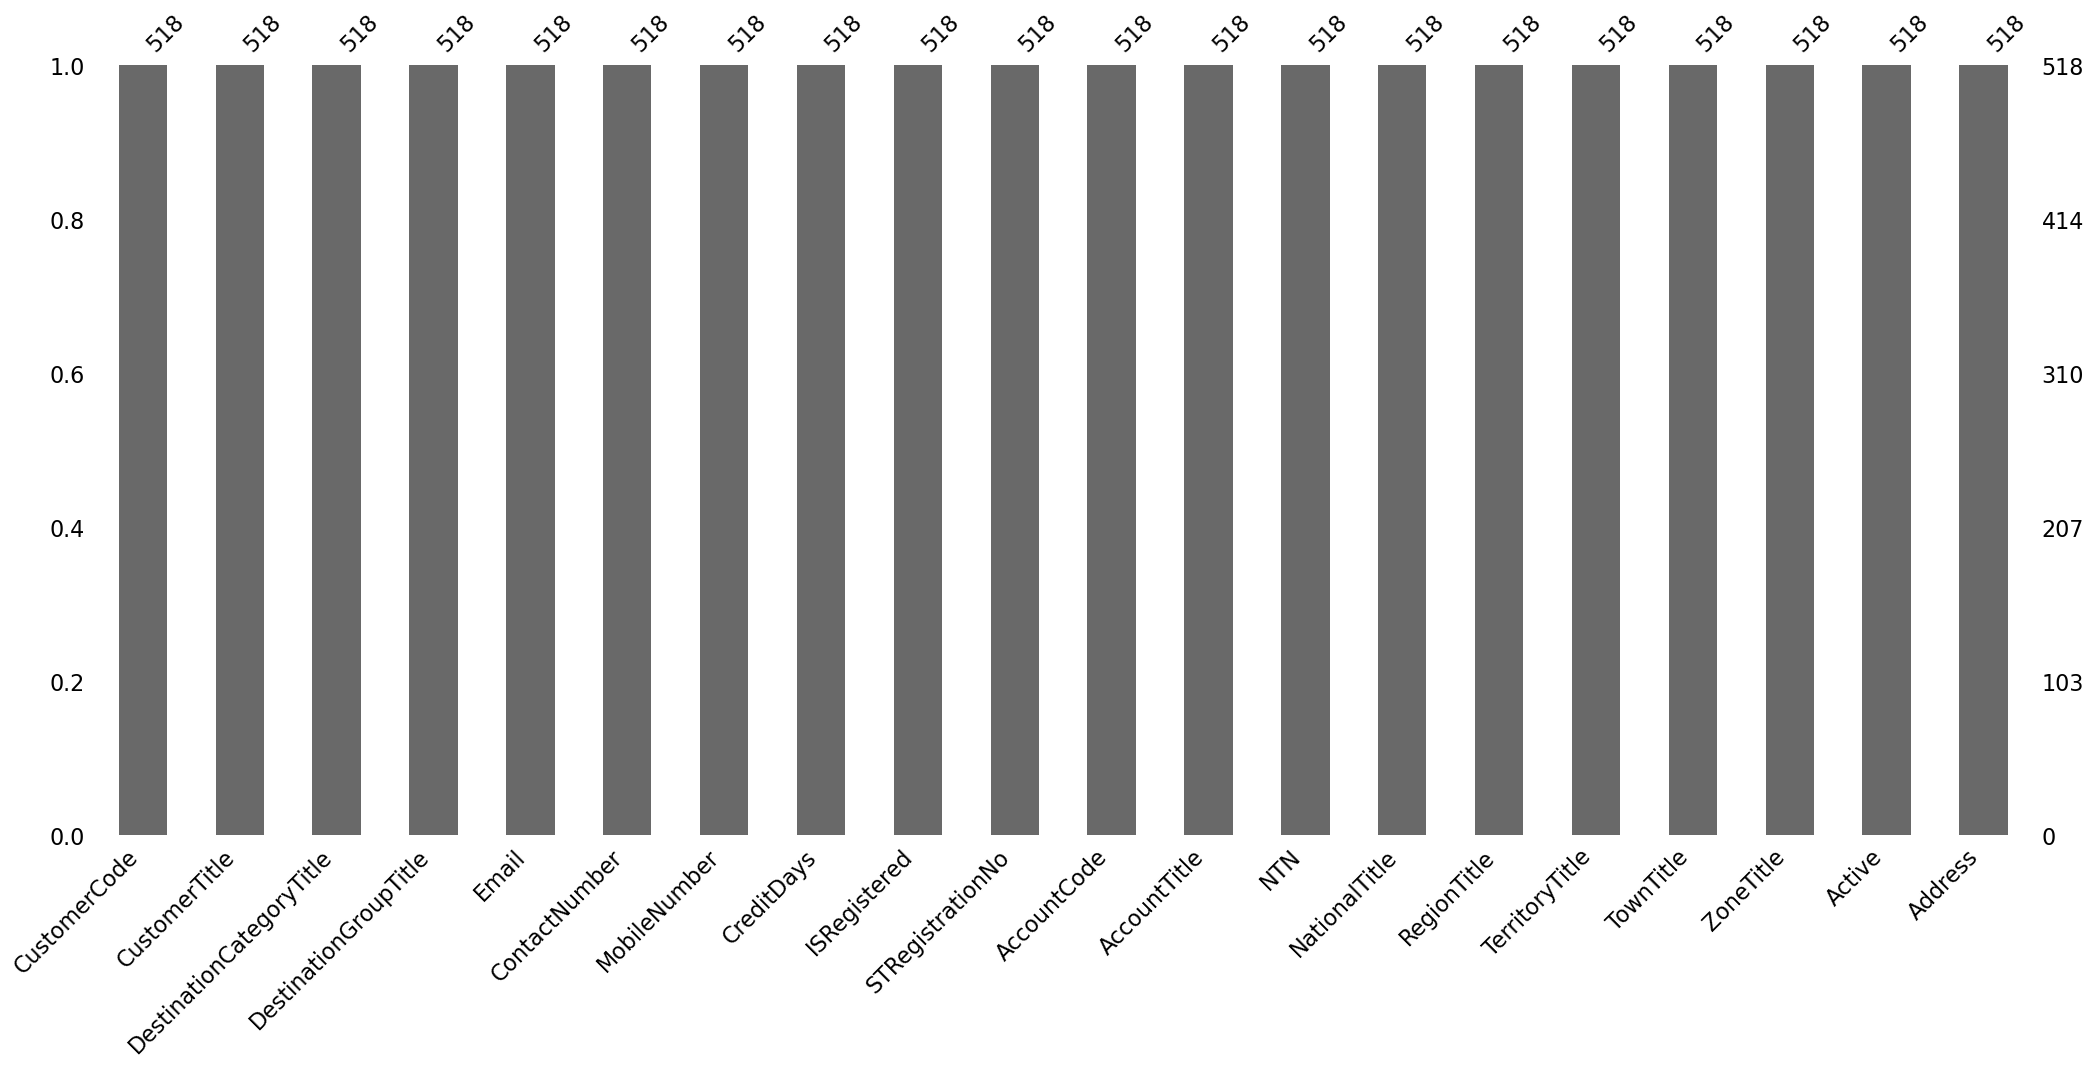

In [16]:
msno.bar(df1)

In [18]:
#changing Column Customer Code datatype to object
df1['CustomerCode'] = df1['CustomerCode'].astype('str')

In [25]:
df1 = df1.replace('-', np.nan)

In [26]:
df1.isnull().sum()

CustomerCode                  0
CustomerTitle                 0
DestinationCategoryTitle      0
DestinationGroupTitle         0
Email                         0
ContactNumber               142
MobileNumber                169
CreditDays                    0
ISRegistered                  0
STRegistrationNo              0
AccountCode                   0
AccountTitle                  0
NTN                         149
NationalTitle                 0
RegionTitle                   0
TerritoryTitle                0
TownTitle                     0
ZoneTitle                     0
Active                        0
Address                       9
dtype: int64

In [28]:
def count(df1):
    empty_strings = df1.astype(str).apply(lambda x: x.str.strip() == '').sum()
    return empty_strings
count(df1)

CustomerCode                0
CustomerTitle               0
DestinationCategoryTitle    0
DestinationGroupTitle       0
Email                       0
ContactNumber               0
MobileNumber                0
CreditDays                  0
ISRegistered                0
STRegistrationNo            0
AccountCode                 0
AccountTitle                0
NTN                         0
NationalTitle               0
RegionTitle                 0
TerritoryTitle              0
TownTitle                   0
ZoneTitle                   0
Active                      0
Address                     0
dtype: int64

In [29]:
#The function returns a boolean value, checks if 0's are present in the column. It then replaces the 0's with null values and return TRUE
#If the column has no return values, the function returns FALSE.

def replacezeros(df1, col_name):
    if df1[df1[col_name] == 0.0].shape[0] > 0:
        df1[col_name] = df1[col_name].replace(0, np.nan)
        return True
    else:
        return False

In [30]:
replacezeros(df1, 'ContactNumber')

False

In [32]:
replacezeros(df1, 'MobileNumber')

False

In [34]:
replacezeros(df1, 'Address')

False

In [35]:
df1.isnull().sum()

CustomerCode                  0
CustomerTitle                 0
DestinationCategoryTitle      0
DestinationGroupTitle         0
Email                         0
ContactNumber               142
MobileNumber                169
CreditDays                    0
ISRegistered                  0
STRegistrationNo              0
AccountCode                   0
AccountTitle                  0
NTN                         149
NationalTitle                 0
RegionTitle                   0
TerritoryTitle                0
TownTitle                     0
ZoneTitle                     0
Active                        0
Address                       9
dtype: int64

In [36]:
#as the missing values in column contact, mobile and ntn cannot be imputed with mean or median or other ways as every customer has unique values for them 
#so we are replacing them with unknown
df1 = df1.replace( np.nan,'unknown')

In [37]:
df1.isnull().sum()

CustomerCode                0
CustomerTitle               0
DestinationCategoryTitle    0
DestinationGroupTitle       0
Email                       0
ContactNumber               0
MobileNumber                0
CreditDays                  0
ISRegistered                0
STRegistrationNo            0
AccountCode                 0
AccountTitle                0
NTN                         0
NationalTitle               0
RegionTitle                 0
TerritoryTitle              0
TownTitle                   0
ZoneTitle                   0
Active                      0
Address                     0
dtype: int64

There isn't much we can do about it as this sheet is primarily categorised and has no missing data. The data does not call for any imputations or extrapolations.

# Sheet 2 - Customer Ledger

In [19]:
df2.dtypes

TranNo               object
TranDate             object
CustomerID            int64
CustomerTitle        object
Amount              float64
TranType             object
TranOrder             int64
DestinationRefNo      int64
dtype: object

In [20]:
df2.shape

(28978, 8)

In [21]:
df2['CustomerID'] = df2['CustomerID'].astype('str')

In [23]:
df2.isnull().sum()

TranNo              0
TranDate            0
CustomerID          0
CustomerTitle       0
Amount              0
TranType            0
TranOrder           0
DestinationRefNo    0
dtype: int64

<AxesSubplot:>

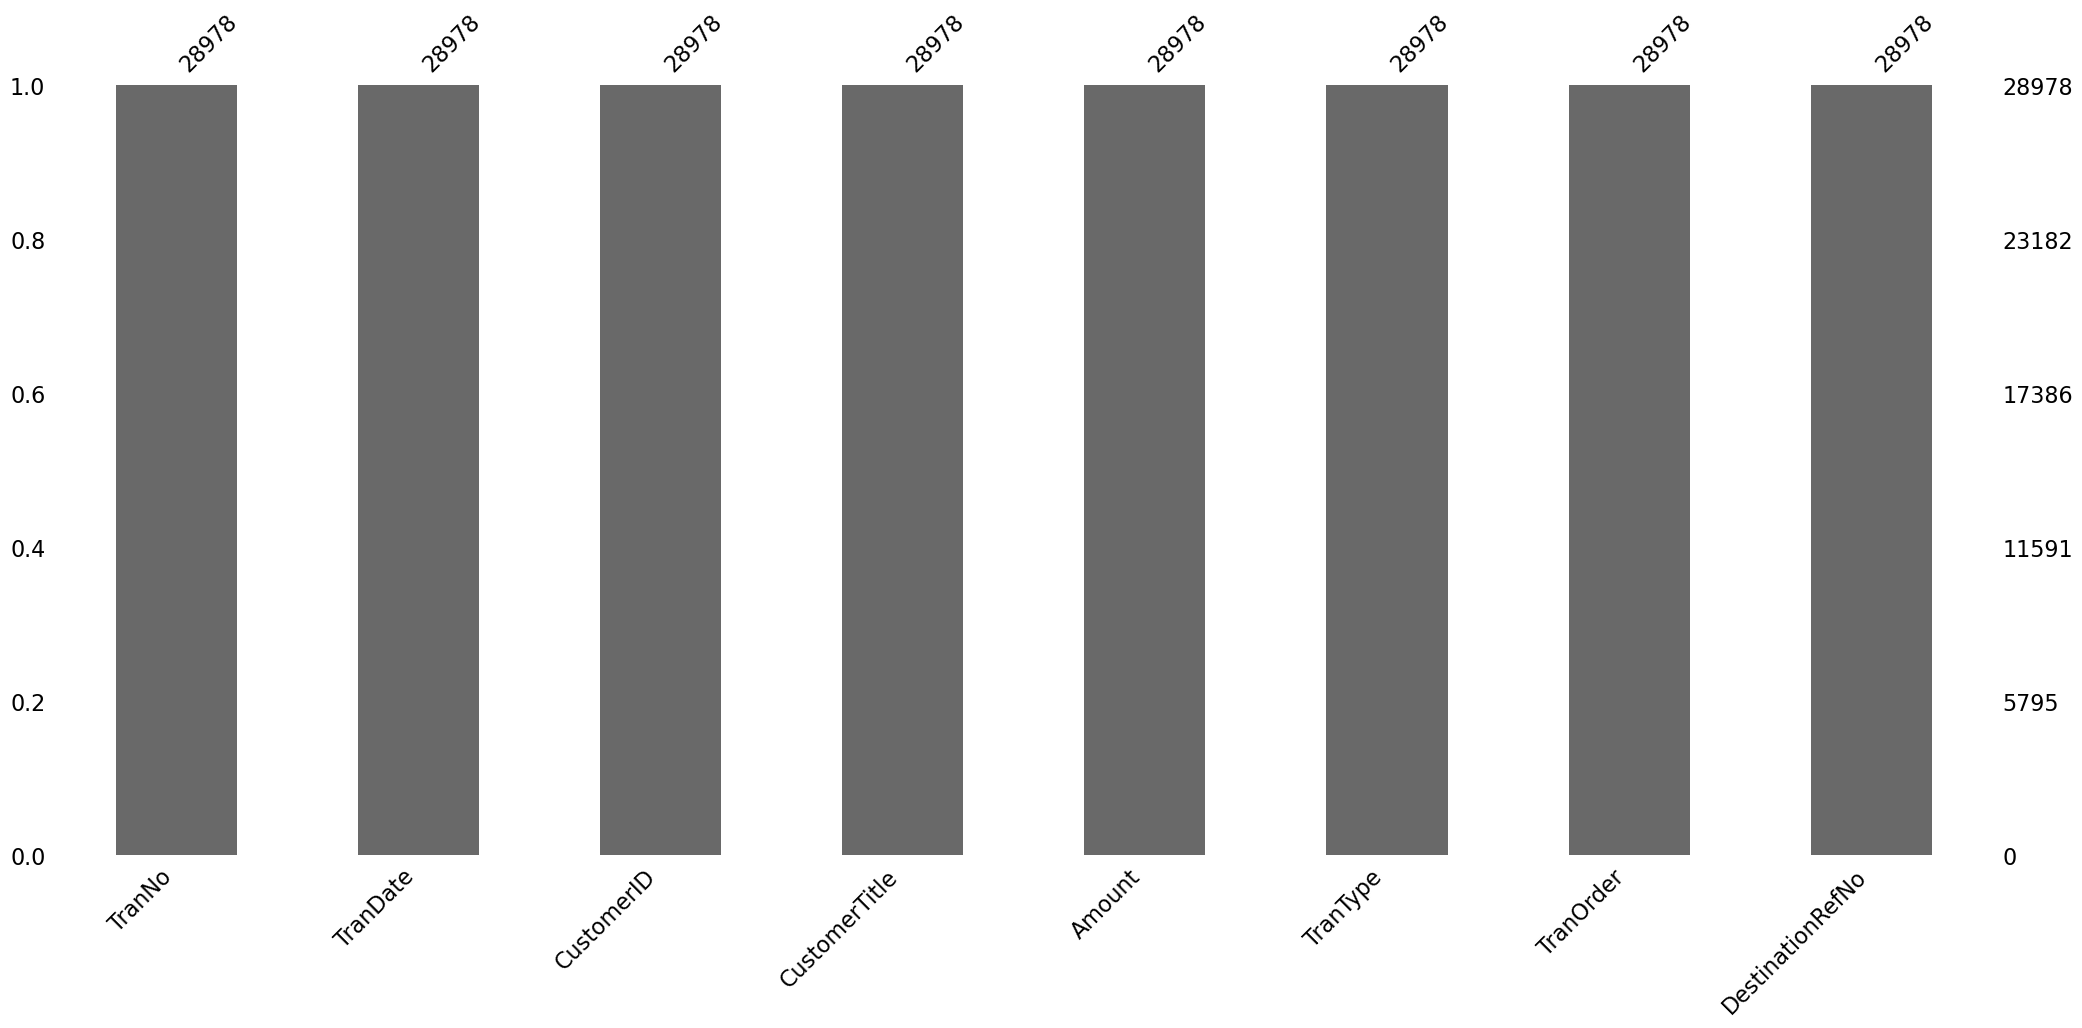

In [24]:
msno.bar(df2)

<AxesSubplot:>

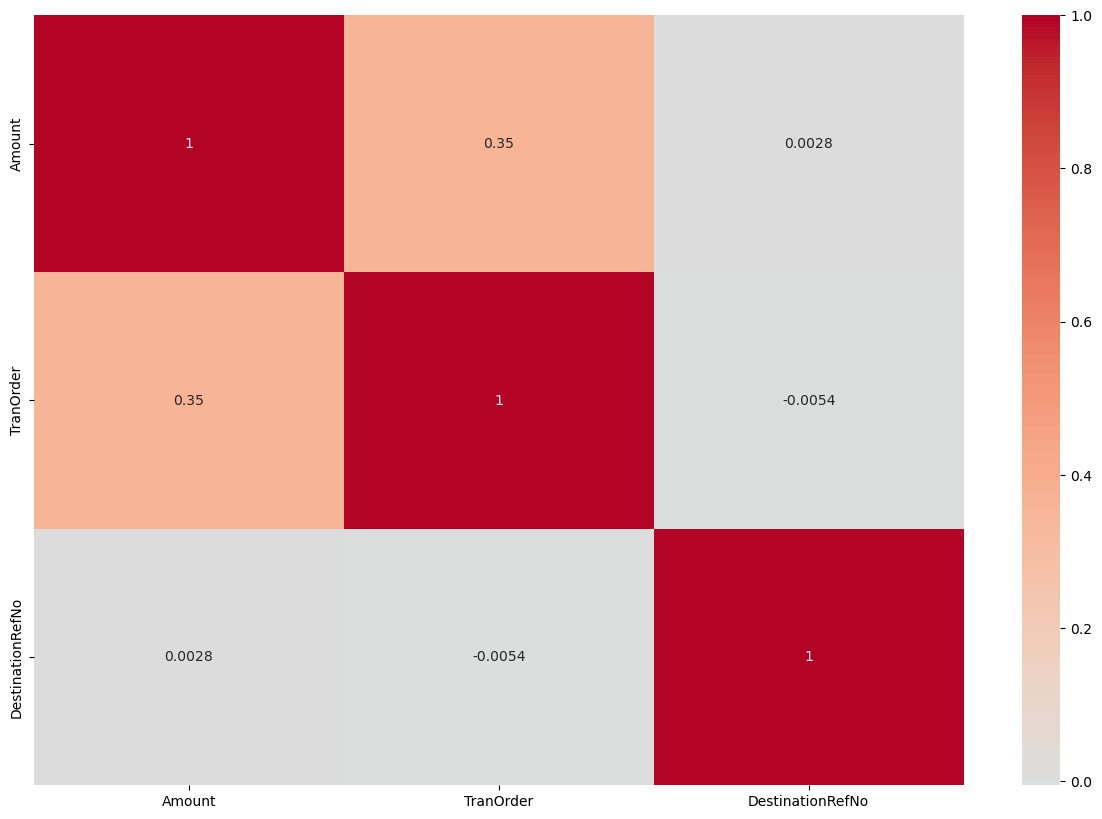

In [38]:
#creating a heatmap for correlation
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', center = 0)

Since this data set is for a customer ledger, we can see that there aren't many columns, and there aren't any significant relationships either. The likelihood that this information won't even yield any viable KPIs is one insight we may draw from it. However, that does not imply that we completely disregard the possibility. 

In [39]:
#keeping check that all customer ids are unique
df2['CustomerID'].nunique()

460

The unique values tell us that there are 460 customer data in the ledger.

In [42]:
df2['TranOrder'].nunique()

3

In [43]:
df2.TranOrder.unique()

array([1, 4, 3], dtype=int64)

# Sheet 3 - Customer Wise

In [44]:
df3.shape

(33711, 12)

In [47]:
df3.describe()

,Item ID,Quantity,Rate,Gross Amount,Discount Amount,Value Excl Tax,Net Amount
count,33711.000000,33711.000000,33711.000000,3.371100e+04,33711.000000,3.371100e+04,3.371100e+04
mean,124.946486,1182.585370,140.327852,5.602313e+04,4192.504292,5.183062e+04,5.183062e+04
std,146.982884,2602.053247,193.694057,1.246660e+05,10353.123407,1.221699e+05,1.221699e+05
min,1.000000,1.000000,0.000000,6.000000e-01,0.000000,-3.360000e+05,-3.360000e+05
25%,6.000000,100.000000,13.000000,9.000000e+03,0.000000,7.680000e+03,7.680000e+03
50%,41.000000,300.000000,85.000000,2.399040e+04,1350.000000,2.025000e+04,2.025000e+04
75%,195.000000,1152.000000,190.000000,5.760000e+04,4590.000000,5.068800e+04,5.068800e+04
max,579.000000,198144.000000,5500.000000,8.029800e+06,456000.000000,8.029800e+06,8.029800e+06


In [48]:
df3.head()

,Transaction ID,Transaction Date,Customer Title,Item ID,Item Title,Unit Title,Quantity,Rate,Gross Amount,Discount Amount,Value Excl Tax,Net Amount
0,1819-000004,14/12/2018,Haram traders shahfaisal,55.0,HOT AND SOUR SOUP 55 GM,pcs,576.0,50.0,28800.0,3456.0,25344.0,25344.0
1,1819-000004,14/12/2018,Haram traders shahfaisal,3.0,SEASONING CHICKEN POWDER 18GM,pcs,5760.0,12.0,69120.0,8294.4,60825.6,60825.6
2,1819-000004,14/12/2018,Haram traders shahfaisal,175.0,PAPAD CRACKER BUTTON COLOR 1KG,kg,24.0,160.0,3840.0,460.8,3379.2,3379.2
3,1819-000004,14/12/2018,Haram traders shahfaisal,40.0,PAPAD CRACKER COLOR 1KG,kg,144.0,160.0,23040.0,2764.8,20275.2,20275.2
4,1819-000004,14/12/2018,Haram traders shahfaisal,6.0,SEASONING CHICKEN POWDER POUCH 1KG,pcs,144.0,400.0,57600.0,6912.0,50688.0,50688.0


In [49]:
df3.dtypes

Transaction ID       object
Transaction Date     object
Customer Title       object
Item ID             float64
Item Title           object
Unit Title           object
Quantity            float64
Rate                float64
Gross Amount        float64
Discount Amount     float64
Value Excl Tax      float64
Net Amount          float64
dtype: object

In [50]:
df3.isnull().sum()

Transaction ID      0
Transaction Date    0
Customer Title      0
Item ID             0
Item Title          0
Unit Title          0
Quantity            0
Rate                0
Gross Amount        0
Discount Amount     0
Value Excl Tax      0
Net Amount          0
dtype: int64

<AxesSubplot:>

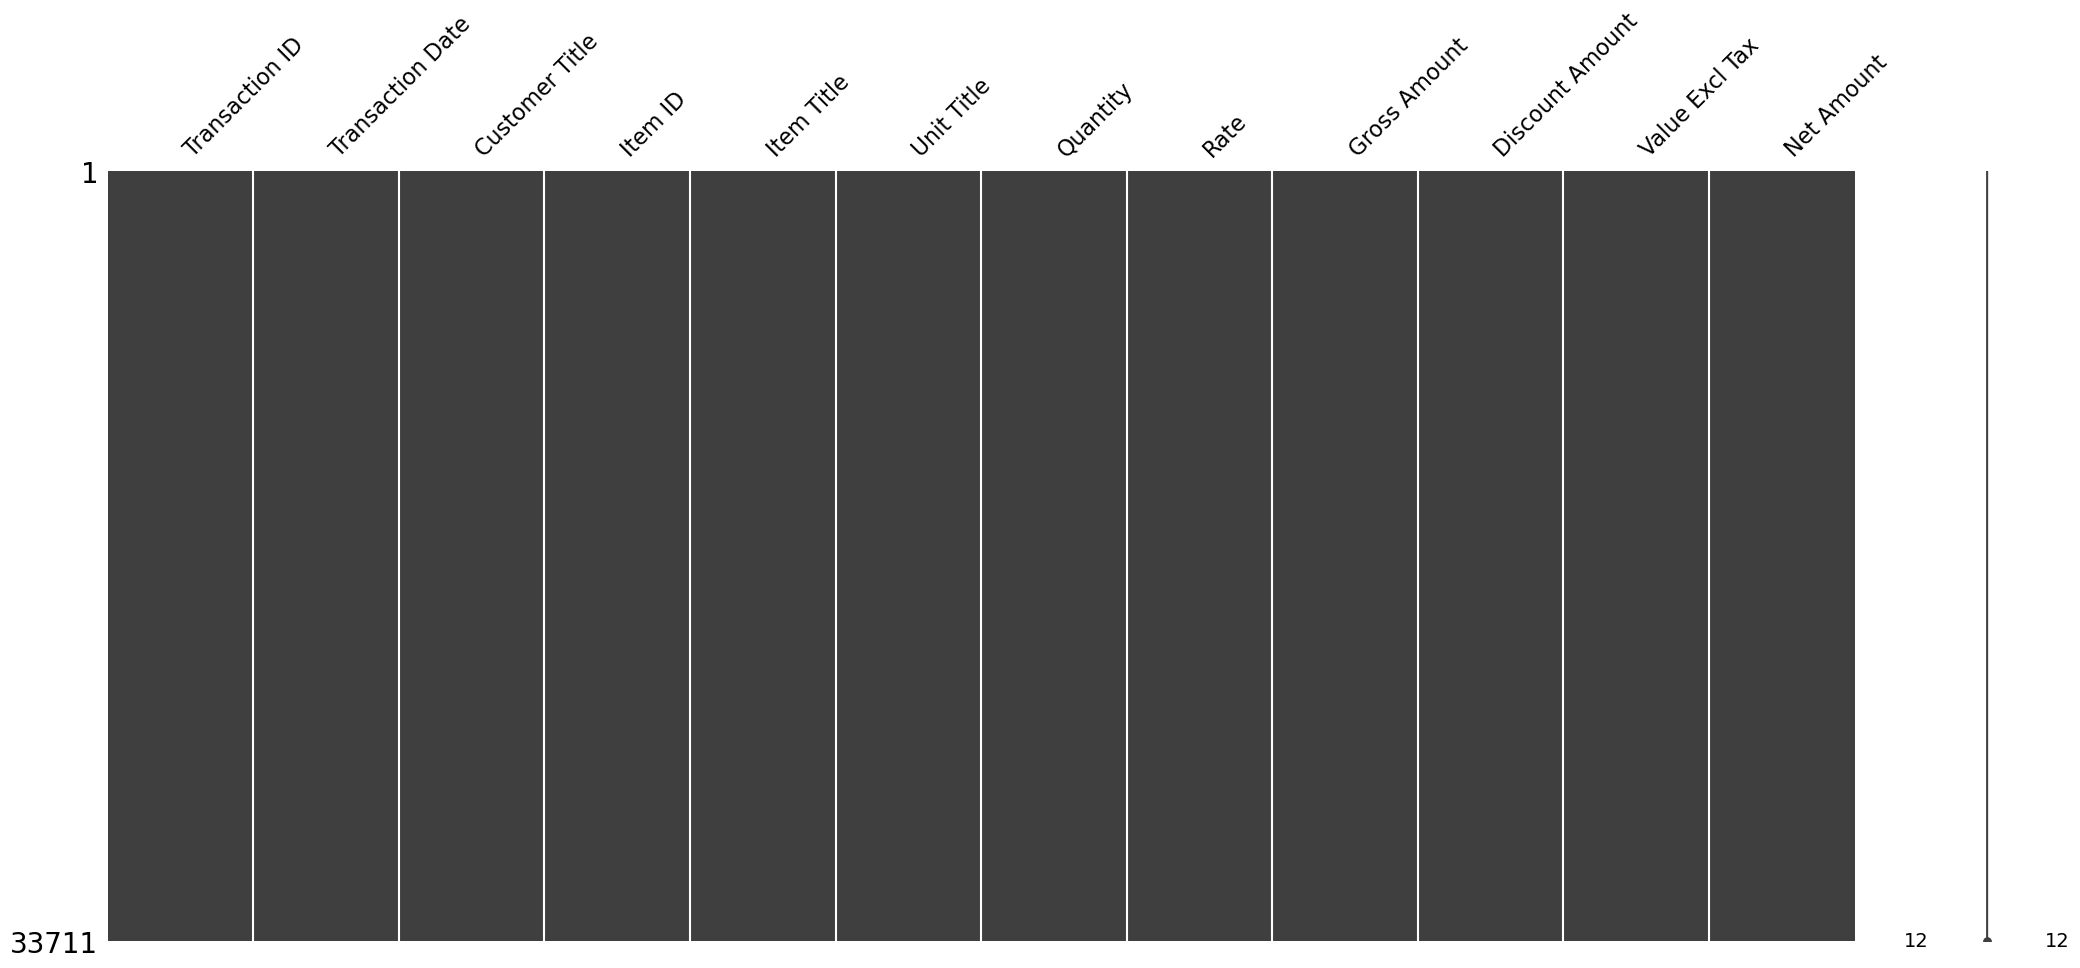

In [51]:
msno.matrix(df3)

In [52]:
df3['Item ID'] = df3['Item ID'].astype('str')

In [53]:
df3.dtypes

Transaction ID       object
Transaction Date     object
Customer Title       object
Item ID              object
Item Title           object
Unit Title           object
Quantity            float64
Rate                float64
Gross Amount        float64
Discount Amount     float64
Value Excl Tax      float64
Net Amount          float64
dtype: object

<AxesSubplot:>

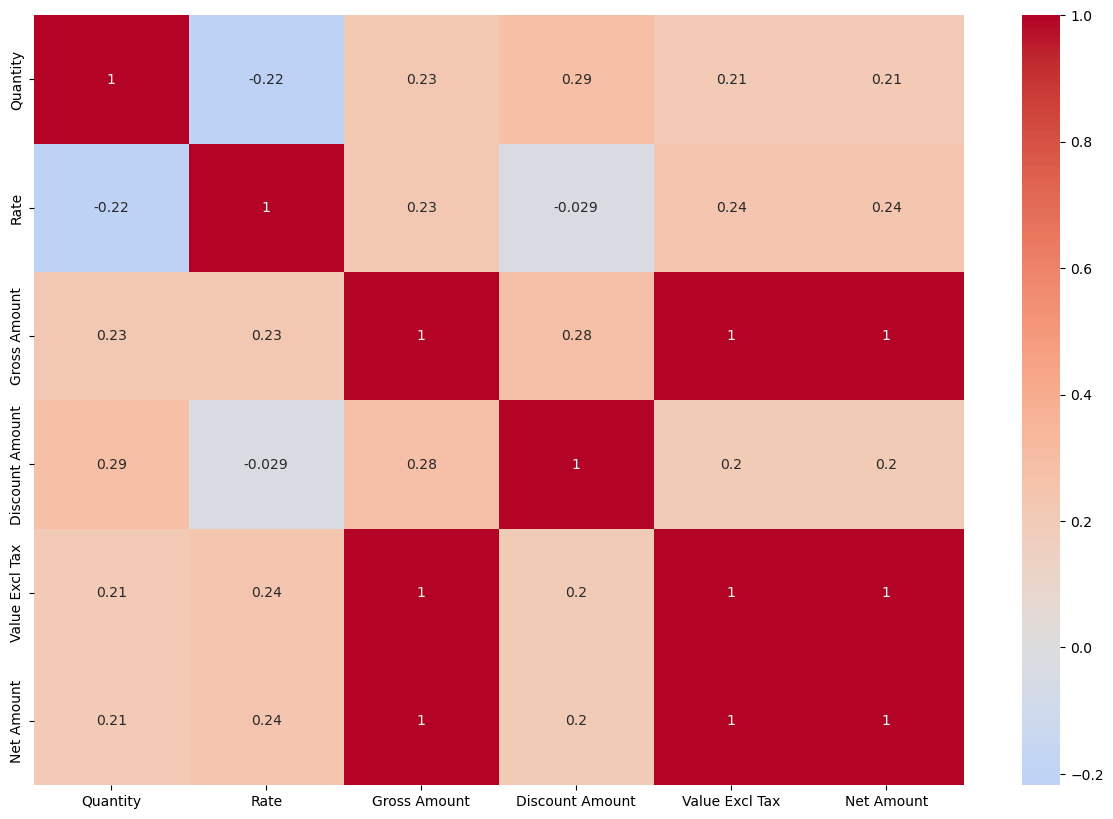

In [54]:
#creating a heatmap for correlation
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', center = 0)

As seen there were no missing values in this sheet, we changed the datatype of one column. otherwise, this sheet is good to go.

# Sheet 4 - DataDump


In [55]:
df4.head()

,sync_time,Customer,Area,City,ProductName,qty,amount,Rate,employeeName,distributorName,BrandName,ProductCategoryName
0,11/30/2021 16:39,Baba Oil Shop,FATIMA JINNAH COLONY,Karachi,Dashi Powder Chicken Sachet 18g,48,624.00,13.00,Muzzamil,asad enterprise,Dashi,retail
1,11/30/2021 16:39,Baba Oil Shop,FATIMA JINNAH COLONY,Karachi,Dashi Powder Chicken 100g,24,1680.00,70.00,Muzzamil,asad enterprise,Dashi,retail
2,11/30/2021 16:40,Obaid Shop,FATIMA JINNAH COLONY,Karachi,Dashi Powder Chicken Sachet 18g,12,156.00,13.00,Muzzamil,asad enterprise,Dashi,retail
3,11/30/2021 16:40,Obaid Shop,FATIMA JINNAH COLONY,Karachi,Funchies Mingalz Choco Balls 12g,12,99.96,8.33,Muzzamil,asad enterprise,Funchies,retail
4,11/30/2021 16:40,Obaid Shop,FATIMA JINNAH COLONY,Karachi,Funchies Mingalz Choco Bites 12g purple,12,99.96,8.33,Muzzamil,asad enterprise,Funchies,retail


In [56]:
df4.shape

(38108, 12)

In [57]:
#checking datatypes that we are dealing with
df4.dtypes

sync_time               object
Customer                object
Area                    object
City                    object
ProductName             object
qty                      int64
amount                 float64
Rate                   float64
employeeName            object
distributorName         object
BrandName               object
ProductCategoryName     object
dtype: object

In [58]:
df4.isnull().sum()

sync_time              0
Customer               0
Area                   0
City                   0
ProductName            0
qty                    0
amount                 0
Rate                   0
employeeName           0
distributorName        0
BrandName              0
ProductCategoryName    0
dtype: int64

In [59]:
df4['Customer'].unique()

array(['Baba Oil Shop', 'Obaid Shop', 'Saving House Shop', ...,
       'Iqbal G.S', 'Sundho', 'Qadri S.S'], dtype=object)

In [60]:
df4['Area'].unique()

array(['FATIMA JINNAH COLONY', 'JACKSON', 'MANZOOR COLONY #1 ',
       'TARIQ ROAD RT', 'BAHADURABAD', 'DEFENCE VIEW',
       'EMPRESS MARKET WITH SARAUNDING', 'LASBELA , PATEL PARA',
       'MEHMOODABAD, 5.6', 'MEHMOODABAD, 1.2', 'RANCHORE LANE NAYA ABAD',
       'LIYARI CHEEL CHOWK + KALAKOT', 'BURNS ROAD + PAKISTAN CHOWK',
       'SADAR (NON-FOOD)', 'SOLDIER BAZAR , KMC MKT.',
       'DOLY KHATA + ANCLE SARYA', 'RAM SAWAMI RANCHORE LANE',
       'DEFENCE PHASE 2 EXT , PHASE 7 , BUKHARI', 'JUBILEE CINEMA',
       'LINSE AREA COMPET', 'PIB COLONY', 'MANZOOR COLONY  #2',
       'AZAM BASTI 100 FT ROAD', 'HILL PARK , SINDHI MUSLIM',
       'SELANI MKT. , DHORAJI , M. ALI', 'PUNJAB COLONY',
       'SHAH FAISAL 3.', 'SHAH FAISAL 4+5', 'SHAH FAILSL # 01 #2',
       'SHAHABUDDIN WITH SARAUNDING', 'PIPRI ', 'GULSHAN-E-HADEED PH1.',
       'GULSHAN-E-HADEED, PHASE 2.', 'MALIR F SOUTH H AREA',
       'CLIFTON , BATH ICE LAND  UP TO TEEN TALWAR', 'KORANGI NO 2.',
       'LANDHI 36/B, B.S.M MARK

In [62]:
df4['City'].unique()

array(['Karachi', 'FSL', 'Gujranwala ', 'sargodah', 'QUETTA', 'Islamabad',
       'Lahore'], dtype=object)

In [64]:
df4['ProductName'].unique()

array(['Dashi Powder Chicken Sachet 18g', 'Dashi Powder Chicken 100g',
       'Funchies Mingalz Choco Balls 12g',
       'Funchies Mingalz Choco Bites 12g purple',
       'Dashi Soup Chicken Vegetable 53g', 'Dashi Soup Hot & Sour 56g',
       'Dashi Soup Chicken Corn 50g', 'Dashi Powder Chicken Pouch 1000g',
       'Funchies Mingalz Choco Balls 330g', 'Papad gol gappay 110 Gm',
       'Funchies Mingalz Chocolate Filled Crunch 12g yello',
       'Papad Prawn Cracker 200gm box', 'Papad Soup cracker 200gm box',
       'Papad White Cracker 500 Gm', 'Dashi Bread Crumbs 200g',
       'Funchies Mingalz Chocolate Filled Crunch 330g',
       'Funchies Mingalz Strawberry Flavoured Crunch 12g',
       'Clearox Scourer Stainless Steal', 'Papad Cracker White 250g',
       'Papad Cracker White Color 250g', 'Dashi Powder Chicken Jar 1000g',
       'Funchies Mingalz Choco Bites Purple 150g',
       'Funchies Mingalz Chocolate Filled Crunch Yellow 150g',
       'Funchies Mingalz Extreme Chocolatey Gree

In [65]:
df4['employeeName'].unique()

array(['Muzzamil', 'Sharib', 'Shoaib', 'Danish', 'Muhammad Arif',
       'Ismail', 'Rehan', 'Abdul Nasir', 'Afzal', 'Waseem', 'faizan',
       'Tanveer Ahmed', 'faraz', 'MSUMAMA SIDDIQUI', 'Noman',
       'Nasir haram', 'waleed', 'JAHANZAIB', 'azhar abbas',
       'Asad Abbas sargodha', 'fahad ', 'Naqeebullah', 'naghman haider',
       'zakir', 'hashmat', 'KHALIL', 'Asfandyar', 'asim', 'ilyas',
       'AD ABBASI', 'UMAIR', 'abu bakar', 'usman', 'NASIR udn', 'azeem',
       'taueef', 'adil zia', 'awais'], dtype=object)

In [66]:
df4['distributorName'].unique()

array(['asad enterprise', 'Haram Trd', 'GUL GEE', 'Junaid', 'PARAS',
       'sales link', 'Zain Traders', 'JA TRADERS ', 'bismillah traders',
       'latief traders', 'UDN', 'asia traders', 'lahore pak traders',
       'rafi traders', 'mfz'], dtype=object)

In [67]:
df4['BrandName'].unique()

array(['Dashi', 'Funchies', 'Moov', 'Dashi / Bakery'], dtype=object)

In [68]:
df4['ProductCategoryName'].unique()

array(['retail', 'bulk'], dtype=object)

<AxesSubplot:>

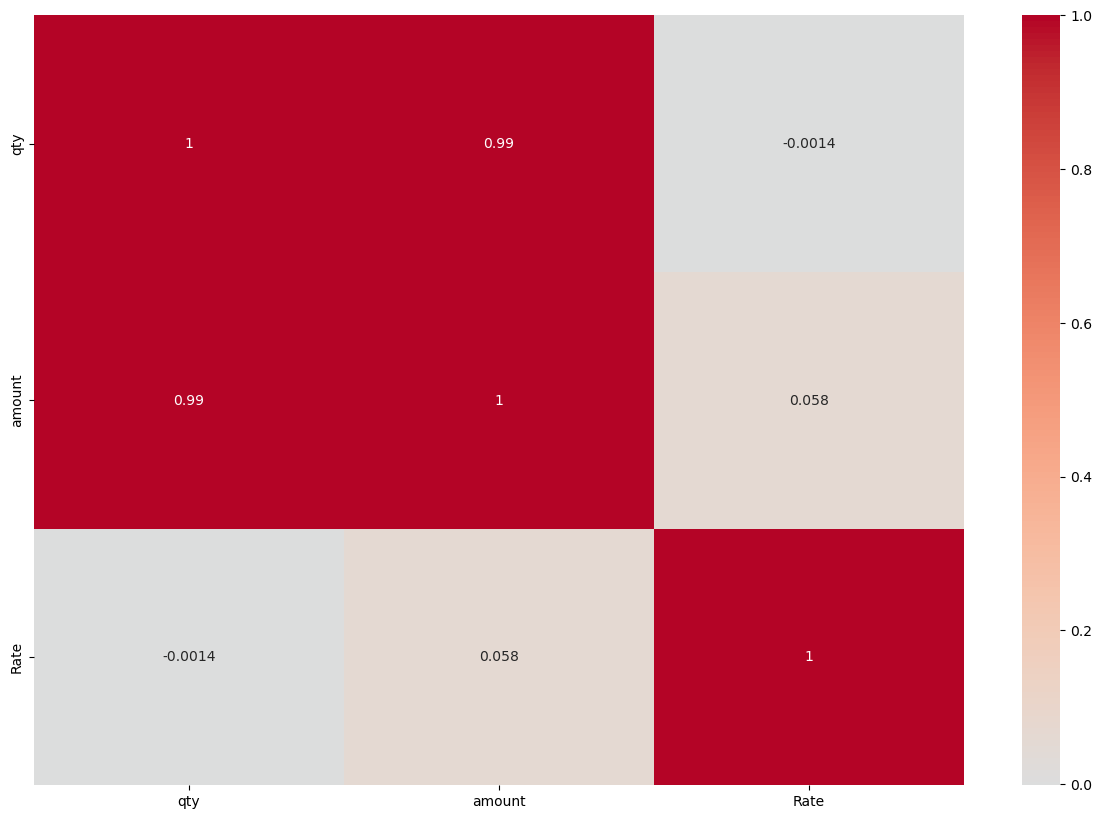

In [69]:
#creating a heatmap for correlation
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', center = 0)

# Sheet 5-Items

In [70]:
df5.head()

,ItemRefNo,ItemTitle,CategoryTitle,SupplierTitle,ClassTitle,GroupTitle,TypeTitle,PackagingTitle,UOMTitle,TaxCategoryTitle,...,DecimalPlaceCount,ManualRate,PurchaseRate,BatchNoRequired,NonInventory,Production,Purchase,QC,Sale,TaxBasedOnCustomer
0,187,Scourer 18gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No
1,188,Scourer 36gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No
2,235,Scourer 20gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No
3,408,SCOURER 15GM,Scourer,None,scourer,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No
4,184,PAPAD TRIANGLE 500GM,cracker,None,3d,finished goods,none,None,pcs,None,...,5,Yes,0.0,No,No,No,No,No,No,No


In [71]:
df5.shape

(578, 22)

In [72]:
df5.dtypes

ItemRefNo               int64
ItemTitle              object
CategoryTitle          object
SupplierTitle          object
ClassTitle             object
GroupTitle             object
TypeTitle              object
PackagingTitle         object
UOMTitle               object
TaxCategoryTitle       object
PcsPerPkt             float64
Active                 object
DecimalPlaceCount       int64
ManualRate             object
PurchaseRate          float64
BatchNoRequired        object
NonInventory           object
Production             object
Purchase               object
QC                     object
Sale                   object
TaxBasedOnCustomer     object
dtype: object

In [73]:
df5.isnull().sum()

ItemRefNo             0
ItemTitle             0
CategoryTitle         0
SupplierTitle         0
ClassTitle            0
GroupTitle            0
TypeTitle             0
PackagingTitle        0
UOMTitle              0
TaxCategoryTitle      0
PcsPerPkt             0
Active                0
DecimalPlaceCount     0
ManualRate            0
PurchaseRate          0
BatchNoRequired       0
NonInventory          0
Production            0
Purchase              0
QC                    0
Sale                  0
TaxBasedOnCustomer    0
dtype: int64

<AxesSubplot:>

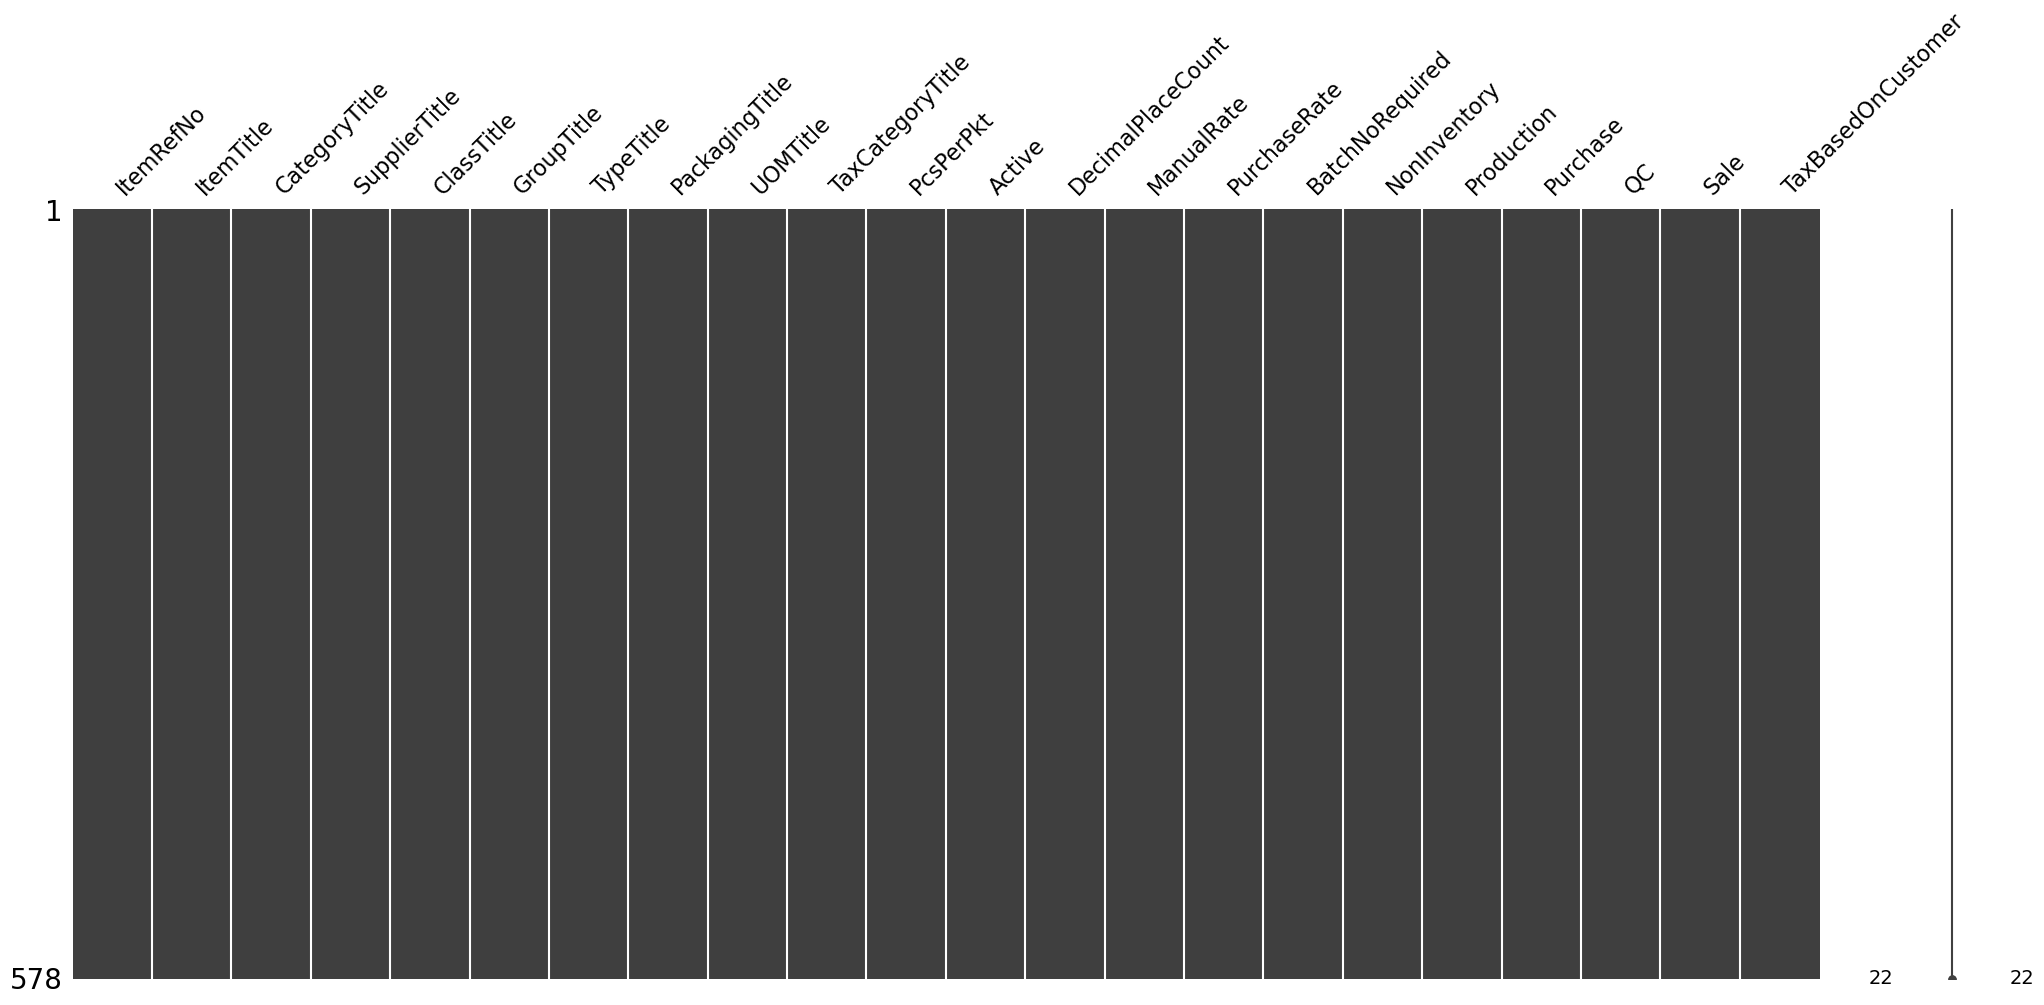

In [74]:
msno.matrix(df5)

In [77]:
#changing Item ref number to object type
df5['ItemRefNo'] = df5['ItemRefNo'].astype('str')

# Sheet 5 - Purchase

In [79]:
df6.head()

,Transaction Date,Supplier Title,Supplier Category,Project Title,Currency Title,Type Title,Godown Title,Category Title,Class Title,Brand Title,Item Title,Unit Title,Item Description,Quantity,Rate,Gross Amount,SalesTax Amount,Net Amount
0,12/1/2018,Sugar Bashir Sugar (SAAD) JODIA,SERVICES,None,PAK Rupee,sugar,Factory Warehouse,glucose & sugar,others,raw material,sugar -moti Ahmed Sb,kg,invert sugar,1250.00,52.00,65000.00,0.00,65000.00
1,12/4/2018,Speciality Printers,PACKING MATERIAL,None,PAK Rupee,soup & ckp,Factory Warehouse,filmFlexiblePackaging,soup & ckp,packing material,chicken powder 100gm roll (new),kg,chicken powder 100gm roll total 78rolls,897.19,445.00,399249.55,67872.42,467121.97
2,12/4/2018,Atif Riaz (Rafhan Corn Starch),RAW MATERIAL,None,PAK Rupee,starchCorn,Factory Warehouse,flour,cracker,raw material,corn starch rafhan 034010,kg,cracker & chicken powder production,15000.00,69.85,1047735.00,0.00,1047735.00
3,12/4/2018,Unity Foods Limited,RAW MATERIAL,None,PAK Rupee,HPKO,Factory Warehouse,Fat,whipCream,raw material,Fat Willmar HPKO,kg,cream production,2000.00,199.00,398000.00,0.00,398000.00
4,12/4/2018,Vendor cash partys,SERVICES,None,PAK Rupee,cornFlour,Factory Warehouse,flour,mingalz,raw material,Corn Flour MMFS2,kg,for funchies production,200.00,39.00,7800.00,0.00,7800.00


In [80]:
df6.shape

(2995, 18)

In [81]:
df6.dtypes

Transaction Date      object
Supplier Title        object
Supplier Category     object
Project Title         object
Currency Title        object
Type Title            object
Godown Title          object
Category Title        object
Class Title           object
Brand Title           object
Item Title            object
Unit Title            object
Item Description      object
Quantity             float64
Rate                 float64
Gross Amount         float64
SalesTax Amount      float64
Net Amount           float64
dtype: object

In [82]:
df6.isnull().sum()

Transaction Date     0
Supplier Title       0
Supplier Category    0
Project Title        0
Currency Title       0
Type Title           0
Godown Title         0
Category Title       0
Class Title          0
Brand Title          0
Item Title           0
Unit Title           0
Item Description     0
Quantity             0
Rate                 0
Gross Amount         0
SalesTax Amount      0
Net Amount           0
dtype: int64

<AxesSubplot:>

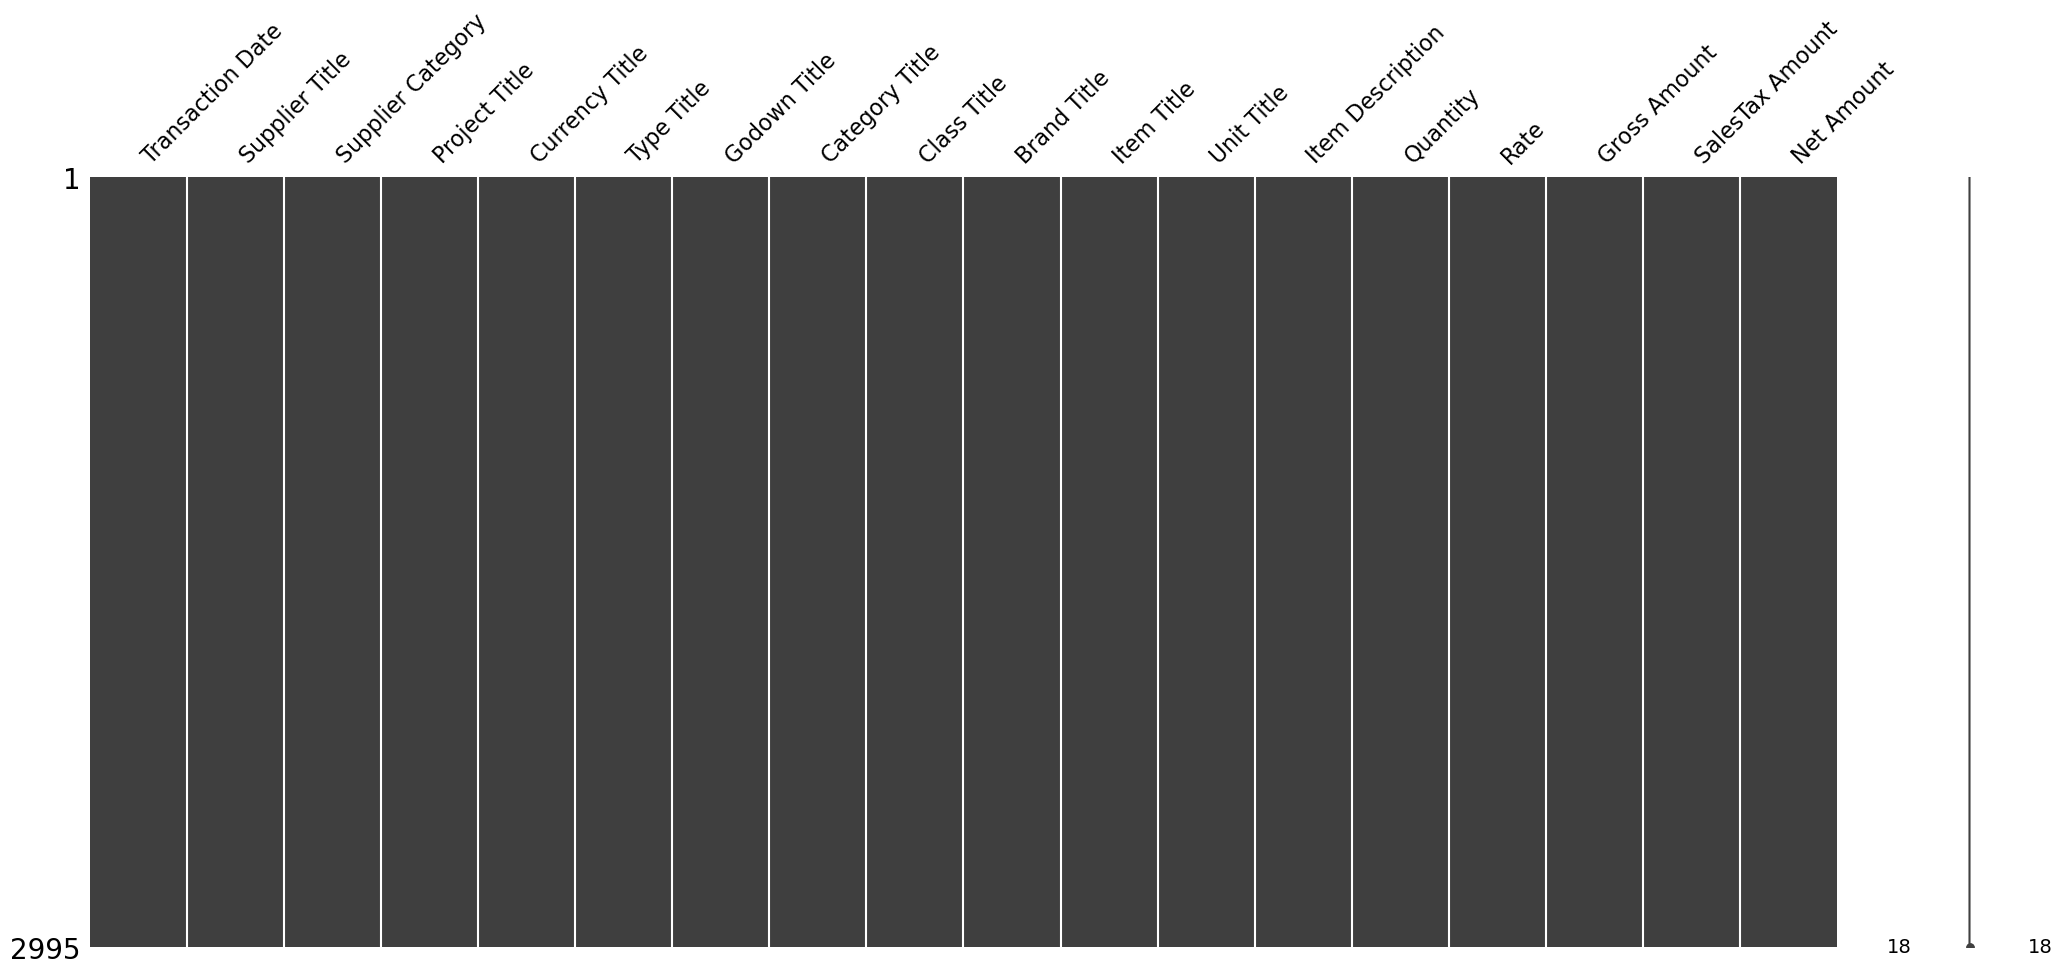

In [83]:
msno.matrix(df6)

As can be seen from the matrix that there are no missing values in this column.

>The remaining columns will be examined for unique values to determine whether or not they are applicable to the wrangling process.
>Generally, this is done for categorical data to determine whether there are sufficient values in the column to convert them to dimensions.

In [84]:
#checking for unique values
df6['Supplier Title'].nunique()

150

In [85]:
df6['Supplier Title'].unique()

array(['Sugar Bashir Sugar (SAAD) JODIA', 'Speciality Printers',
       'Atif Riaz (Rafhan Corn Starch)', 'Unity Foods Limited',
       'Vendor cash partys', 'A one Packages Cartons',
       'Mirpurkhas Sugar Mills ltd', 'Khamissa International',
       'Humayun Cargill ( javed sarvana )', 'Al Habib Masala',
       'Chemicalwala Corp. Jodia', 'Usman Ice Box Maker',
       'Hub Salt Refinery', 'N.a Enterprises', 'Foodlink',
       'Al-Ameen Salt', 'Qureshi Flour Mills', 'Flavor M.A.J Flavor',
       'Areeba food industries', 'MULTI PACKAGES AAMIR',
       'Khizer Printers', 'Silat Impex Abdul Qadir starch', 'Hussain Can',
       'HANGZHOU ZHONGBAO IMP AND EXP CORP.LTD.', 'Marjan food',
       'F&A International', 'ANHUI EBUY INTERNATIONAL', 'Klarg Exports',
       'CJ CHEILJEDANG CORPORATION', 'MAK KEMICAL', 'Brother Enterprise',
       'Habib ADM Limited', 'Bhaya food dip ',
       'Tape Fair Pack International pvt ltd', 'Urban Packages',
       'S.K Plastic', 'Deer food industries', '

In [86]:
df6['Supplier Category'].unique()

array(['SERVICES', 'PACKING MATERIAL', 'RAW MATERIAL',
       'International Supplier', 'Local Supplier', 'GENERAL & CONSUMABLE',
       'Wali Serivices'], dtype=object)

In [87]:
df6['Project Title'].unique()

array(['None'], dtype=object)

In [88]:
df6['Currency Title'].unique()

array(['PAK Rupee', 'US Dollar', 'Euro', 'chinese yuan'], dtype=object)

In [89]:
df6['Type Title'].unique()

array(['sugar', 'soup & ckp', 'starchCorn', 'HPKO', 'cornFlour',
       'mingalz', 'proteinSodiumCaseinate', 'CocoaPowder', 'powderGarlic',
       'powderGinger', 'powderKlonji', 'powderSaunf', 'powderHaldi',
       'powderMustard', 'powderKhatai', 'acid sodium di acetate',
       'whipcream', 'salt', 'PropyleneGlycolLiquid', 'white',
       'dextroseAnhydrouse', 'maidaHard', 'maltExtractLiquid', 'lime',
       'mango', 'dipChocolate', 'ricewhole', 'acid citric', 'cakegel',
       'hpmc', 'acid adipic', 'dsp', 'iplusG', 'yeastExtract',
       'proteinWheatGluten', 'cookingOil', 'powderFructose', 'tween60',
       'FDCorn', 'vanillanMingalz', 'sorbitol', 'tomato', 'dipStrawberry',
       'Production', 'cracker', 'Bakery', 'none', 'maltoseSyrup',
       'chickenOil', 'riceflour', 'acid tartaric', 'powderSkimmedMilk',
       'zeera whole', 'acid malic', 'chickenIFF', 'sio2', 'maltodexterin',
       'colorCaramel', 'calciumCarbonate', 'maidaSooji',
       'sodiumBiCarbonate', 'Biryani', 'm

In [90]:
df6['Godown Title'].unique()

array(['Factory Warehouse', 'HO Ware House', 'Jamshed town Warehouse',
       'Eximpo Cold storage'], dtype=object)

In [91]:
df6['Category Title'].unique()

array(['glucose & sugar', 'filmFlexiblePackaging', 'flour', 'Fat',
       'cartons', 'milkAndProteins', 'vegetable powder', 'foodChem',
       'food color', 'Flavors', 'partiallyFinished', 'flexible packaging',
       'displayBox', 'dehydratedVegetables', 'bucket', 'bag',
       'emulsifier', 'tape', 'label', 'marketingMaterial',
       'cleanignRelated', 'General factory purchase', 'seasoning',
       'Machinery Spare Parts', 'none', 'machineCosumbale', 'overwrap',
       'Scourer', 'others', 'cracker', 'packagedPowderMix'], dtype=object)

In [92]:
df6['Class Title'].unique()

array(['others', 'soup & ckp', 'cracker', 'whipCream', 'mingalz',
       'chocolate', 'seasoning', 'cakegel', 'kheer', 'extrusion',
       'crackers', 'soups', 'Production', 'Bakery', 'none', 'raita',
       'flour', 'jelly', 'scourer', 'breadcrumb', 'chickenFat',
       'golgappay', 'Handsantizer', 'Hand wash', '3d', 'juice',
       'panReleaseOil', 'chicken powder'], dtype=object)

In [94]:
df6['Brand Title'].unique()

array(['raw material', 'packing material', 'consumables', 'services',
       'finished goods', 'machineParts'], dtype=object)

In [95]:
df6['Item Title'].unique()

array(['sugar -moti Ahmed Sb', 'chicken powder 100gm roll (new)',
       'corn starch rafhan 034010', 'Fat Willmar HPKO',
       'Corn Flour MMFS2',
       'Funchies MC1 Carton (dimension 540 x 457 x 406mm)',
       'sugar refined pharma grade', 'sodium Cassienate', 'Cocoa Powder',
       'Garlic Powder Local', 'ginger powder (Sounth)', 'Kalonji',
       'Saunf Powder', 'Turmeric (Haldi)', 'sarson - mustard powder ',
       'Khatai Powder', 'Sodium di Acetate', 'Ice box',
       'Dashi MC1 1kg cracker Carton (dimension 410x325x355 mm)', 'salt',
       'Propylene glycol PG', 'TITANIUM DIOXIDE', 'dextroseAnhydrouse',
       'Hard Maida', 'Malt Extract', 'Lime Flavor k-0308797',
       'Green Mango Flavor D-1510211', 'dipChocolate',
       'chicken zaiqa powder 25kg non woven bag',
       'Display Box Chicken powder 100gm (150x165x130mm)',
       'corn starch rafhan 034010F', 'rice whole', 'CITRIC ACID',
       'Plastic 1kg bucket', 'chicken powder 18gm roll (new)',
       'HPMC methyl ce

In [96]:
df6['Unit Title'].unique()

array(['kg', 'pcs', 'none'], dtype=object)

<AxesSubplot:>

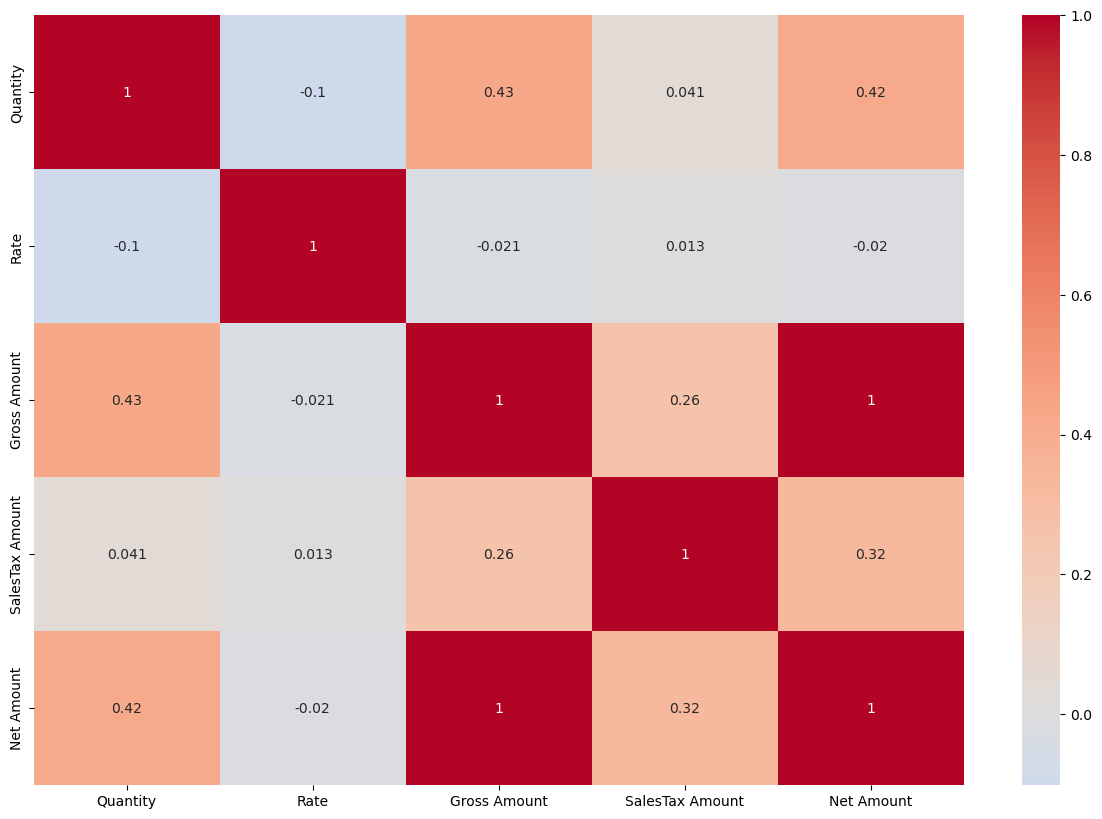

In [97]:
#creating a heatmap for correlation
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df6.corr(), annot=True, cmap='coolwarm', center = 0)

# UNIVARIATE ANALYSIS OF THE DATA

# Historgrams/Box Plots for Anomaly Detection

In [109]:
#TIETJEN MOORE TEST FOR OUTLIER DETECTION
def tmttest(data, alpha=0.5):
    n = len(data)
    m = np.median(data)
    s = np.sum((data - m) ** 3) / (n * (np.std(data) ** 3))
    t = (s * np.sqrt(n - 1)) / np.sqrt(6)
    critical_value = np.sqrt(np.pi / 2) * np.sqrt((n - 1) * (1 - (alpha ** (2 / (n - 1))))) / np.sqrt(2 * np.log(np.log(n)))
    return abs(t) > critical_value
#TRUE indicates presence of outliers
#False indicates no presence of outliers

# Sheet 1 - Customer Ledger

<AxesSubplot:xlabel='Amount', ylabel='Density'>

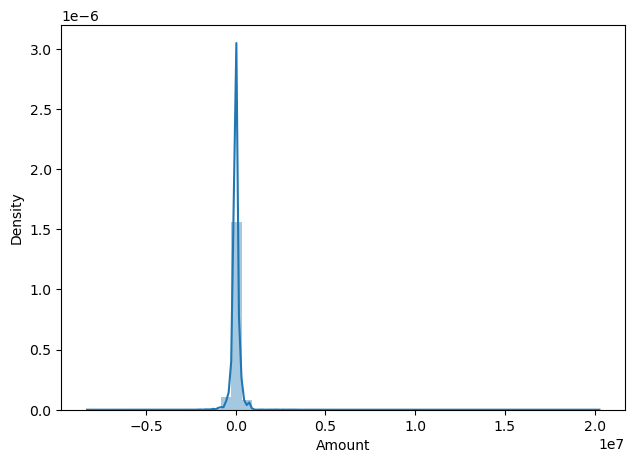

In [101]:
#looking at the disrubtion curve
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Amount'])

<AxesSubplot:xlabel='Amount'>

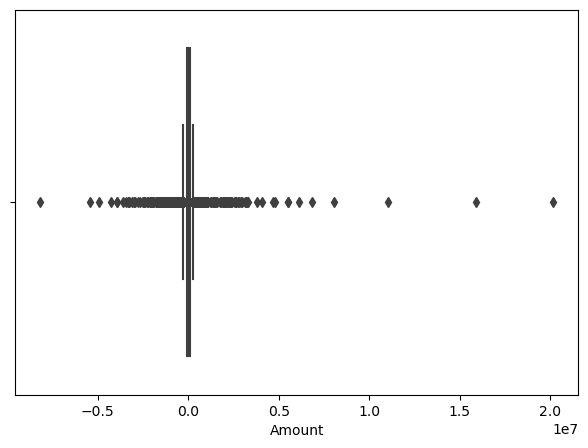

In [102]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df2['Amount'])

In [103]:
df2.loc[df2['Amount'] > 100000]

,TranNo,TranDate,CustomerID,CustomerTitle,Amount,TranType,TranOrder,DestinationRefNo
25,1819-000757,01/02/2019,1656,Abid Chemical Fsb,145000.0,Invoice,4,12
27,1920-002397,19/03/2020,1656,Abid Chemical Fsb,150000.0,Invoice,4,12
29,CDN1819-000006,30/11/2018,1657,Al Habib CHICKEN,355076.0,DrNote,4,13
34,1819-000686,25/01/2019,1657,Al Habib CHICKEN,214750.0,Invoice,4,13
35,1819-000716,29/01/2019,1657,Al Habib CHICKEN,145000.0,Invoice,4,13
...,...,...,...,...,...,...,...,...
28961,2122-003372,22/02/2022,8301,Shakeel Traders Faisalabad,255000.0,Invoice,4,527
28967,2122-003396,23/02/2022,8517,Elemensis General Trading LLc,772119.6,Invoice,4,529
28969,2122-003681,28/02/2022,8543,Anus Bread Crumbs wastage,172800.0,Invoice,4,530
28971,2122-003848,24/03/2022,8580,wali & Co. scrape,189700.0,Invoice,4,531


In [110]:
tmttest(df2['Amount'], alpha=0.5)
#This indicates that there are outliers in the column

True

<Figure size 1200x500 with 0 Axes>

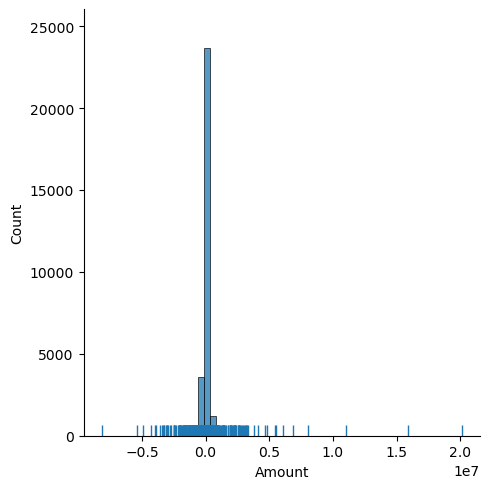

In [111]:
plt.figure(figsize=(12,5))
sns.displot(df2['Amount'], bins=60, rug=True)
plt.show()
#Shows the frequency of Amount

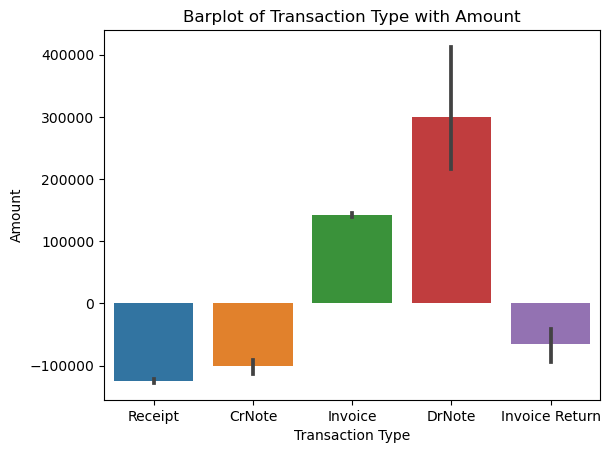

In [112]:
sns.barplot(data=df2, x="TranType", y="Amount")
plt.title("Barplot of Transaction Type with Amount")
plt.xlabel("Transaction Type")
plt.ylabel("Amount")
plt.show()

Giving consumers credit shows that you value and have faith in their ability to pay their payments on time. Customers will continue to purchase from you as a result of these confident actions. This suggests that in this instance, the abnormalities are beneficial.

# Customer Wise

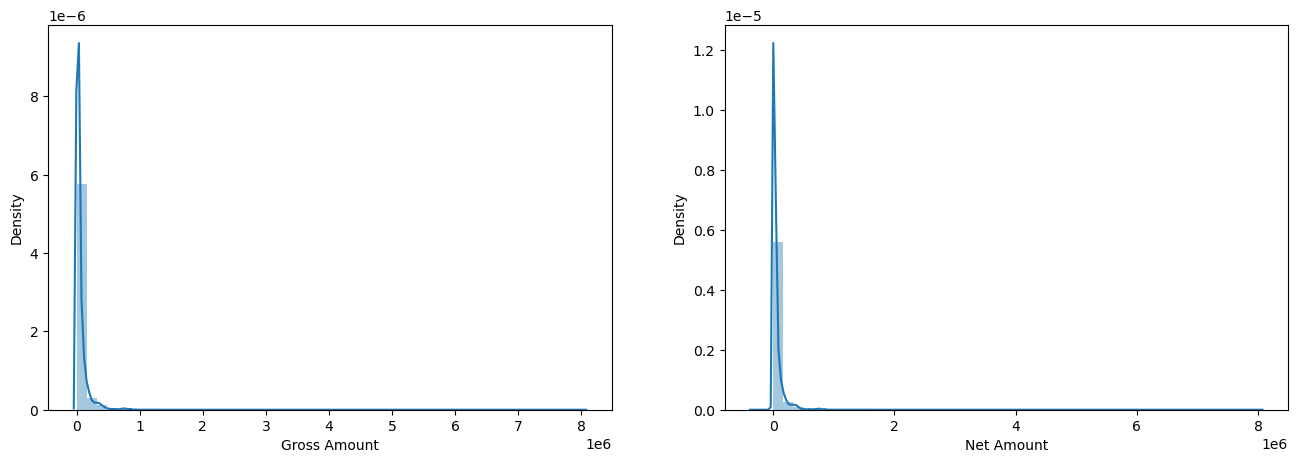

In [104]:
#looking at the disrubtion curve
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['Gross Amount'])
plt.subplot(1,2,2)
sns.distplot(df3['Net Amount'])
plt.show()

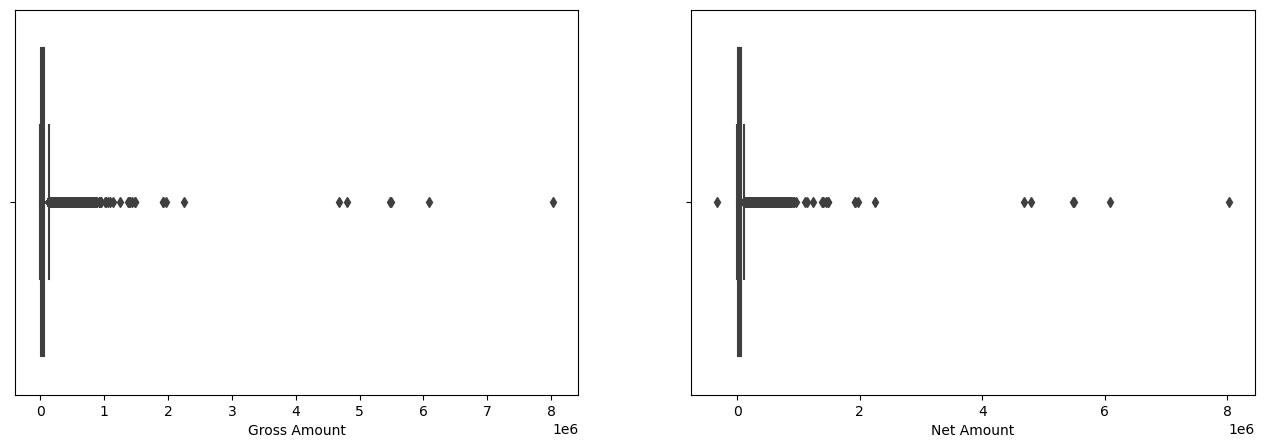

In [105]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df3['Gross Amount'])
plt.subplot(1,2,2)
sns.boxplot(df3['Net Amount'])
plt.show()

In [120]:
tmttest(df3['Gross Amount'], alpha=0.5)
#This indicates that there are outliers in the column

True

In [121]:
tmttest(df3['Net Amount'], alpha=0.5)
#This indicates that there are outliers in the column

True

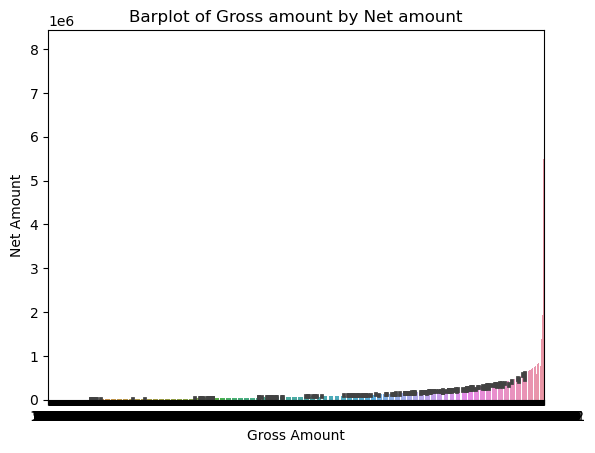

In [123]:
sns.barplot(data=df3, x="Gross Amount", y="Net Amount")
plt.title("Barplot of Gross amount by Net amount")
plt.xlabel("Gross Amount")
plt.ylabel("Net Amount")
plt.show()

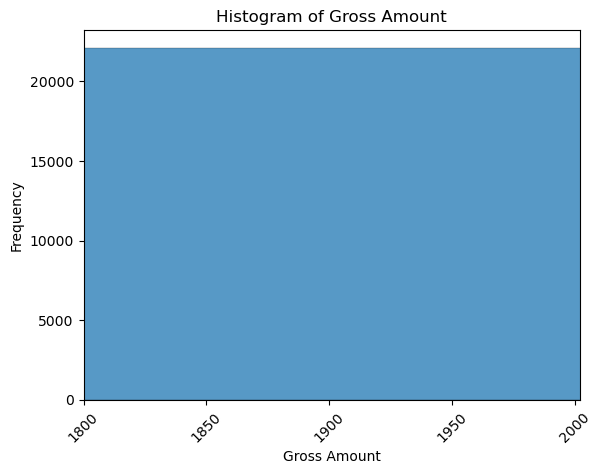

In [124]:
sns.histplot(data=df3, x="Gross Amount", bins=200)
plt.xlim(1800, 2002)
plt.xticks(range(1800, 2002, 50), rotation=45)
plt.title("Histogram of Gross Amount")
plt.xlabel("Gross Amount")
plt.ylabel("Frequency")
plt.show()

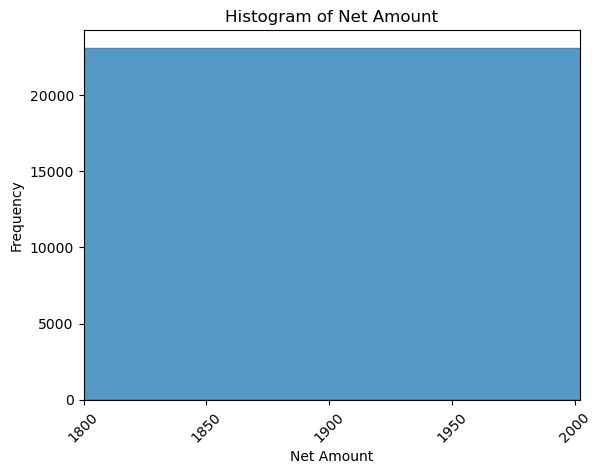

In [125]:
sns.histplot(data=df3, x="Net Amount", bins=200)
plt.xlim(1800, 2002)
plt.xticks(range(1800, 2002, 50), rotation=45)
plt.title("Histogram of Net Amount")
plt.xlabel("Net Amount")
plt.ylabel("Frequency")
plt.show()

As we can see that anomalies here are beneficial for the company.

# Now For PURCHASE

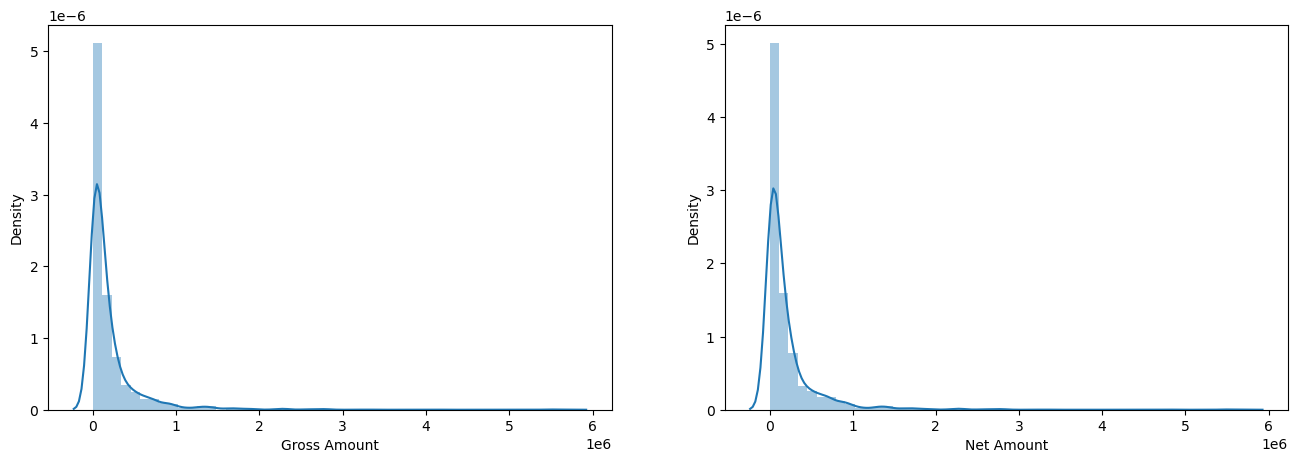

In [106]:
#looking at the disrubtion curve
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df6['Gross Amount'])
plt.subplot(1,2,2)
sns.distplot(df6['Net Amount'])
plt.show()

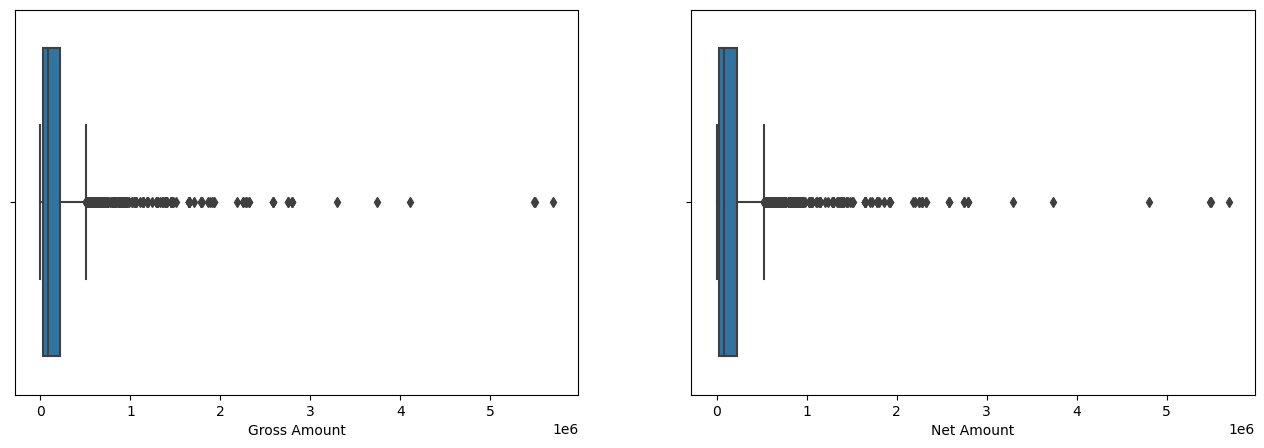

In [107]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df6['Gross Amount'])
plt.subplot(1,2,2)
sns.boxplot(df6['Net Amount'])
plt.show()

In [126]:
tmttest(df6['Gross Amount'], alpha=0.5)
#This indicates that there are outliers in the column

True

In [127]:
tmttest(df6['Net Amount'], alpha=0.5)
#This indicates that there are outliers in the column

True

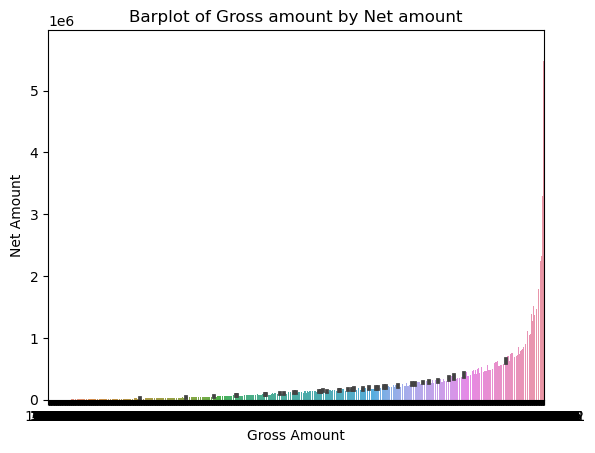

In [128]:
sns.barplot(data=df6, x="Gross Amount", y="Net Amount")
plt.title("Barplot of Gross amount by Net amount")
plt.xlabel("Gross Amount")
plt.ylabel("Net Amount")
plt.show()

# LASTLY, For DATADUMP

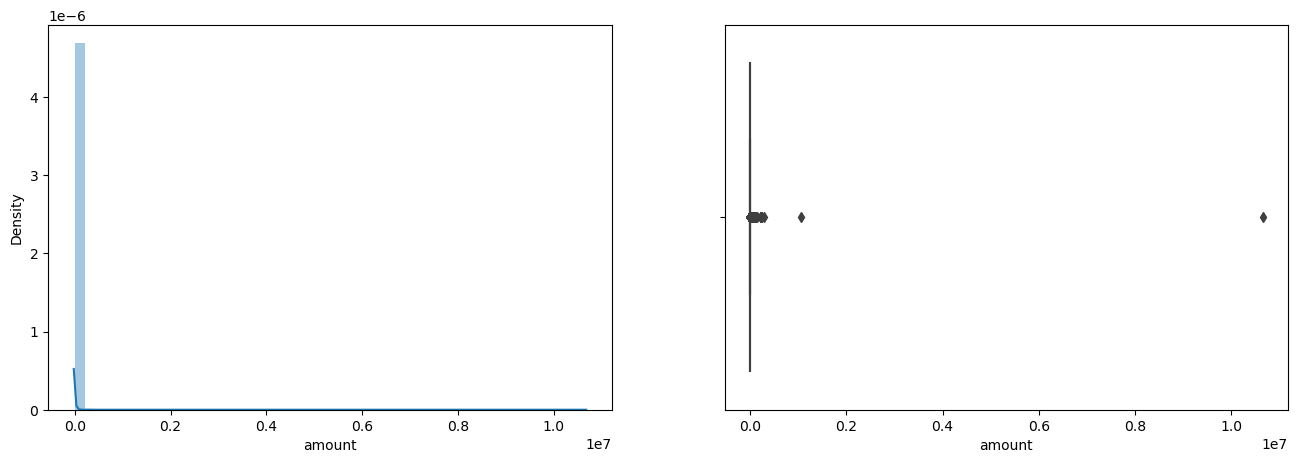

In [108]:
#looking at the disrubtion curve
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df4['amount'])
plt.subplot(1,2,2)
sns.boxplot(df4['amount'])
plt.show()

In [129]:
tmttest(df4['amount'], alpha=0.5)
#This indicates that there are outliers in the column

True

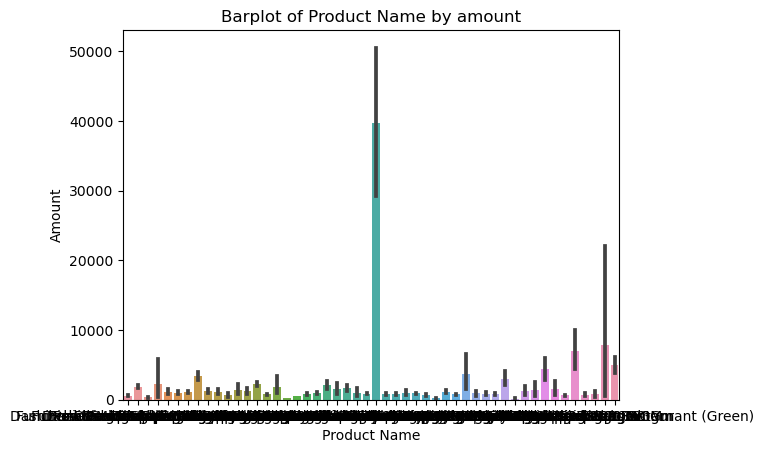

In [131]:
sns.barplot(data=df4, x="ProductName", y="amount")
plt.title("Barplot of Product Name by amount")
plt.xlabel("Product Name")
plt.ylabel("Amount")
plt.show()

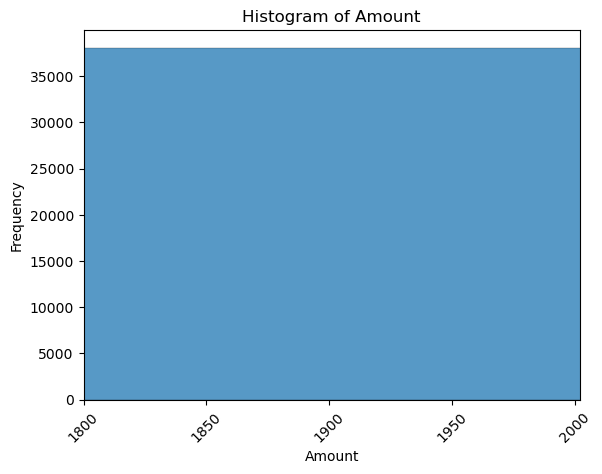

In [132]:
sns.histplot(data=df4, x="amount", bins=200)
plt.xlim(1800, 2002)
plt.xticks(range(1800, 2002, 50), rotation=45)
plt.title("Histogram of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# BIVARIATE ANALYSIS OF THE DATA

In [133]:
import pandas as pd
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


CHI-SQUARED TEST

The function takes in categorical variables and returns dependent if they are correlated and independent otherwise.

In [134]:
def chitest(df, col1, col2, alpha=0.05):

    data_crosstab = pd.crosstab(df[col1], df[col2], margins=False)
    stat, p, dof, expected = chi2_contingency(data_crosstab)
    if p <= alpha:
        return 'Dependent (reject H0)'
    else:
        return 'Independent (fail to reject H0)'

In [135]:
chitest(df1,'CustomerTitle','Active')


'Independent (fail to reject H0)'

In [136]:
chitest(df1,'DestinationCategoryTitle','DestinationGroupTitle')


'Dependent (reject H0)'

In [137]:
chitest(df2,'TranType','TranOrder')


'Dependent (reject H0)'

In [138]:
chitest(df3,'Gross Amount','Net Amount')


'Dependent (reject H0)'

In [139]:
chitest(df3,'Quantity','Rate')


'Dependent (reject H0)'

In [140]:
chitest(df4,'Rate','amount')


'Dependent (reject H0)'

In [142]:
df1.to_csv('CleanedCustomer.csv', index=False)
df2.to_csv('CleanedCustomerLedger.csv', index=False)
df3.to_csv('CleanedCustomerWise.csv', index=False)
df4.to_csv('CleanedDataDump.csv', index=False)
df5.to_csv('CleanedItem.csv', index=False)
df6.to_csv('CleanedPurchase.csv', index=False)